# Spotify Top Artists and Song Audio Feature Analysis


### Importing in the function module and collecting the data
_in this phase we used the functions we created in the file spotify api functions, to read in, clean, and format the data._

In [87]:
#import the spotify_api_functions module and all necessary libraries
from spotify_api_functions import *
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#use the get_token_and_spotify function to authorize requests made to Spotify API
female_artists_spotify_token = get_token_and_spotify('e501f11ba57f4779afc1e3d3c92f2c01','ccae21b077444375a2cebe9f4815f2f8')
male_artists_spotify_token = get_token_and_spotify('eea9fb64c2e1475594015bb4cc5d8eb2','d2a74f042d9c4648a163d30e9dcba0e5')

#next use the imported functions to create the following Dictionaries/lists:
#female_artists (artist names and their urls)
female_artists = get_artist_from_playlist(female_artists_spotify_token, female_playlist_uri)
male_artists = get_artist_from_playlist(male_artists_spotify_token, male_playlist_uri)

#artists_attributes: name, popularity, follower count, genres
female_artists_attributes = get_artists_attributes(female_artists_spotify_token,female_artists)
male_artists_attributes = get_artists_attributes(male_artists_spotify_token, male_artists)

#top_songs: top 10 songs from each of the top artists
female_top_songs = get_artist_top_songs(female_artists_spotify_token, female_artists)
male_top_songs = get_artist_top_songs(male_artists_spotify_token, male_artists)

#song_features: song name, artist, and audio features (i.e. dancability, energy, tempo)
female_song_features = get_song_features_artists(female_artists_spotify_token, female_top_songs)
male_song_features = get_song_features_artists(male_artists_spotify_token, male_top_songs)

retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


In [3]:
#unnesting the song_features dictionary into a pandas DF
#reset the index and drop the old index column

#for female
female_song_features_df = pd.concat(pd.DataFrame(l) for l in female_song_features)
female_song_features_df.reset_index(inplace = True)
female_song_features_df = female_song_features_df.drop(['index'],axis=1)

#for male 
male_song_features_df = pd.concat(pd.DataFrame(l) for l in male_song_features)
male_song_features_df.reset_index(inplace = True)
male_song_features_df = male_song_features_df.drop(['index'],axis=1)

In [4]:
#the columns are non-numeric, so use apply to broadcast pd.to_numeric to 
#the correct columns/cells (all audio feature columns)
#then ensure it the columns are the correct datatype

column_names = ['acousticness', 'danceability','duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence']

female_song_features_df[column_names] = female_song_features_df[column_names].apply(pd.to_numeric)

male_song_features_df[column_names] = male_song_features_df[column_names].apply(pd.to_numeric)

female_song_features_df.info()
male_song_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 16 columns):
artist_name         496 non-null object
song_names          496 non-null object
song_popularity     496 non-null int64
acousticness        496 non-null float64
danceability        496 non-null float64
duration_ms         496 non-null int64
energy              496 non-null float64
instrumentalness    496 non-null float64
key                 496 non-null int64
liveness            496 non-null float64
loudness            496 non-null float64
mode                496 non-null int64
speechiness         496 non-null float64
tempo               496 non-null float64
time_signature      496 non-null int64
valence             496 non-null float64
dtypes: float64(9), int64(5), object(2)
memory usage: 62.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
artist_name         500 non-null object
song_names          500 non-null object
son

In [5]:
#check the dataframe
female_song_features_df.head(3)

,artist_name,song_names,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Ariana Grande,7 rings,87,0.6010,0.771,178627,0.320,0.0,1,0.0885,-10.752,0,0.3160,139.844,4,0.312
1,Ariana Grande,"thank u, next",84,0.2400,0.735,207320,0.638,0.0,1,0.1020,-5.605,1,0.0785,107.016,4,0.402
2,Ariana Grande,"break up with your girlfriend, i'm bored",93,0.0378,0.726,190440,0.545,0.0,5,0.1080,-5.489,0,0.1020,169.991,4,0.348


In [6]:
male_song_features_df.head(3)

,artist_name,song_names,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Drake,God's Plan,88,0.0332,0.754,198973,0.449,0.000083,7,0.552,-9.211,1,0.109,77.169,4,0.357
1,Drake,In My Feelings,87,0.0589,0.835,217925,0.626,0.000060,1,0.396,-5.833,1,0.125,91.030,4,0.350
2,Drake,Nonstop,87,0.0164,0.912,238614,0.412,0.013000,7,0.104,-8.074,1,0.124,154.983,4,0.422


In [7]:
#save the song features df as a csv file
female_song_features_df.to_csv('female_artists_song_features.csv')
male_song_features_df.to_csv('male_artists_song_features.csv')

In [8]:
#make female_artists and artists_attributes into DFs
female_artists_uri = pd.DataFrame(female_artists)
female_artists_attributes = pd.DataFrame(female_artists_attributes)

male_artists_uri = pd.DataFrame(male_artists)
male_artists_attributes = pd.DataFrame(male_artists_attributes)

#save artists attributes df to a csv file
female_artists_attributes.to_csv('female_artists_Attributes.csv')
male_artists_attributes.to_csv('male_artists_Attributes.csv')

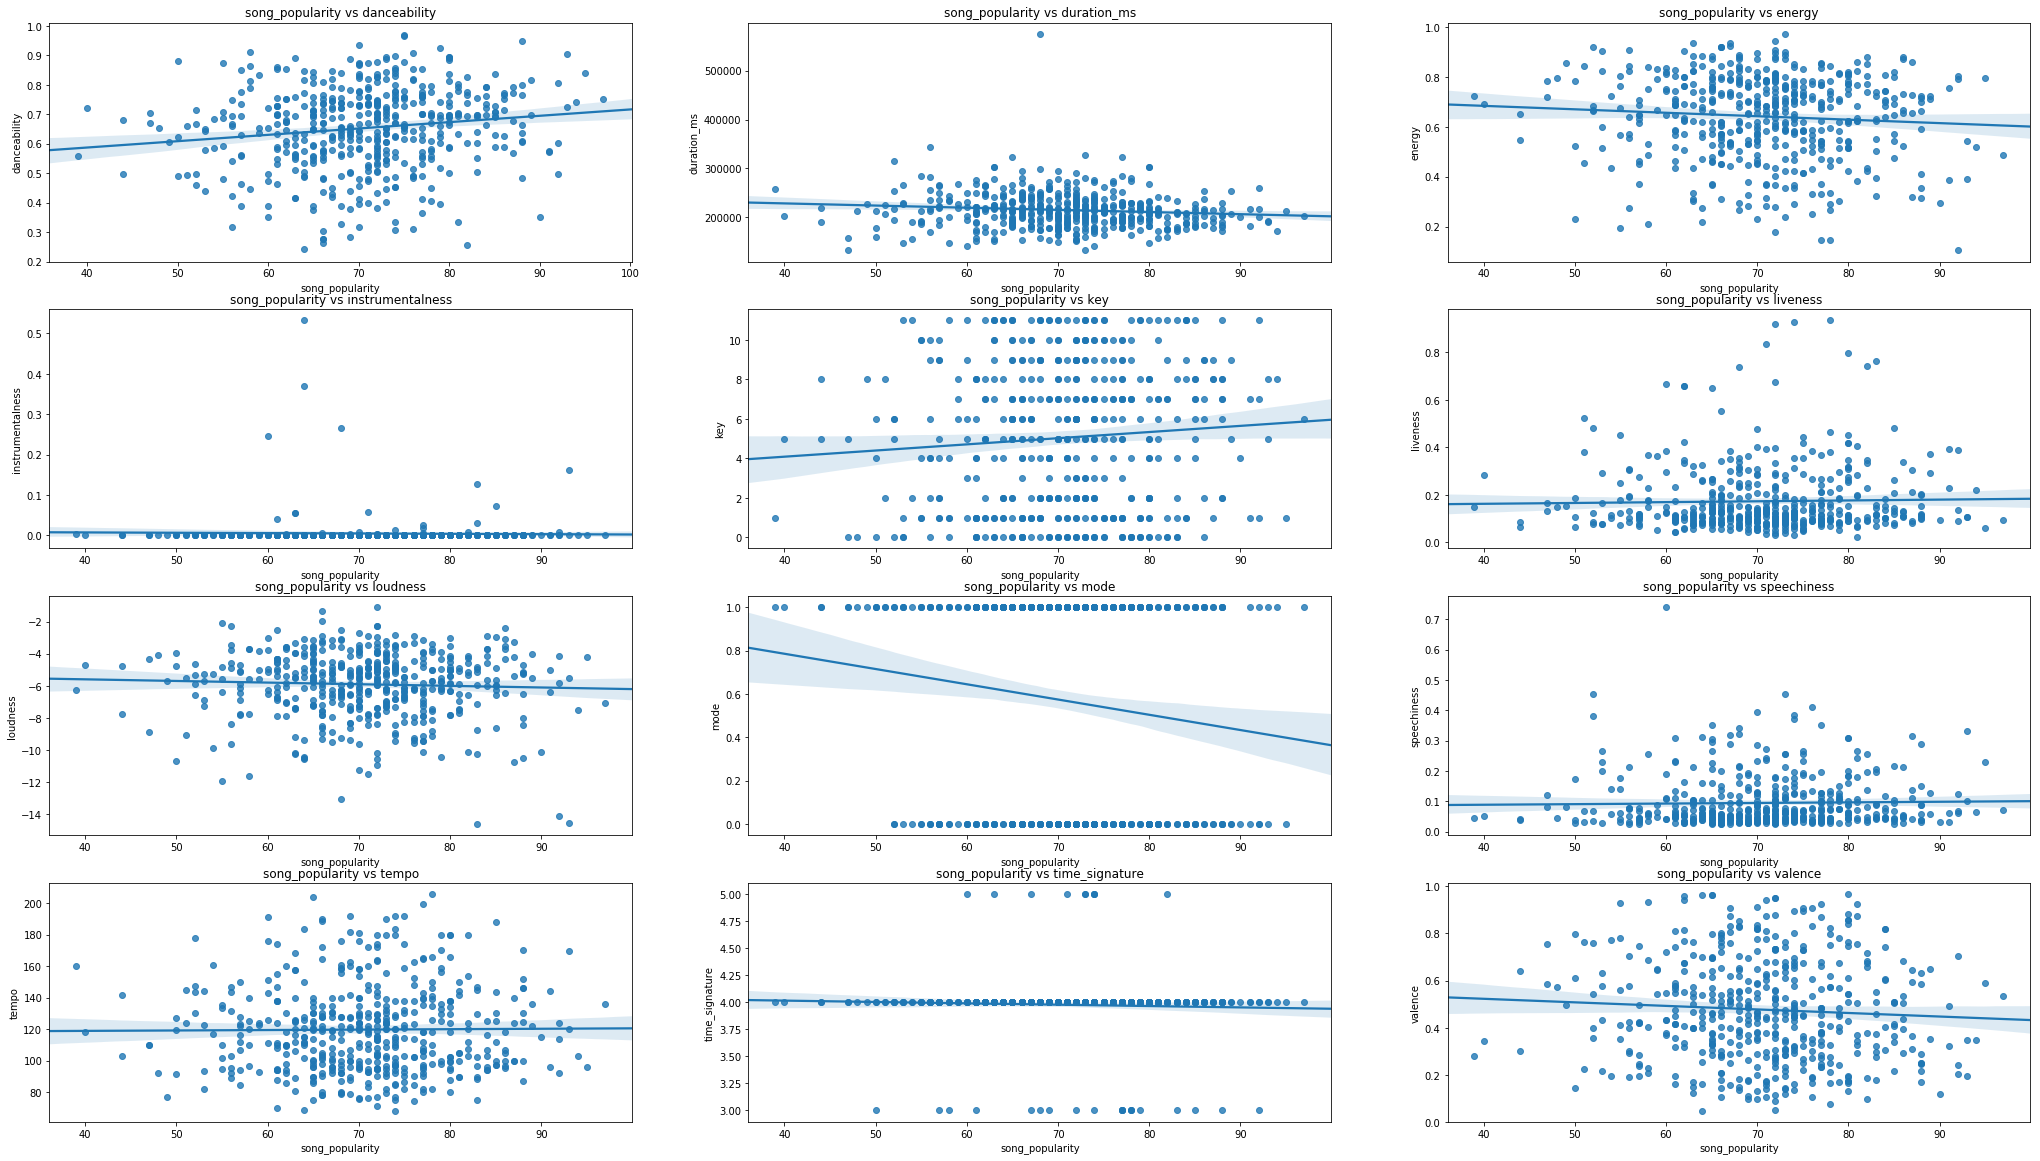

In [10]:
#first we plotted a few regresson plots and then decided to do them all at once
#use the function create_subplots_songFeatures() to plot these for the data frame
#create a list of the columns we want to run against song popularity

#ax = sns.regplot(x="song_popularity", y="acousticness", data=song_features_df)
# ax = sns.regplot(x="song_popularity", y="danceability", data=song_features_df)

features_to_plot = ['acousticness', 'danceability', 'duration_ms', 'energy',
                    'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                    'speechiness', 'tempo', 'time_signature', 'valence']

#pass the df, the columns, and the final name of the png file
female_subplots = create_subplots_regplot(female_song_features_df,features_to_plot,'female_song_features_correlation.png')
    

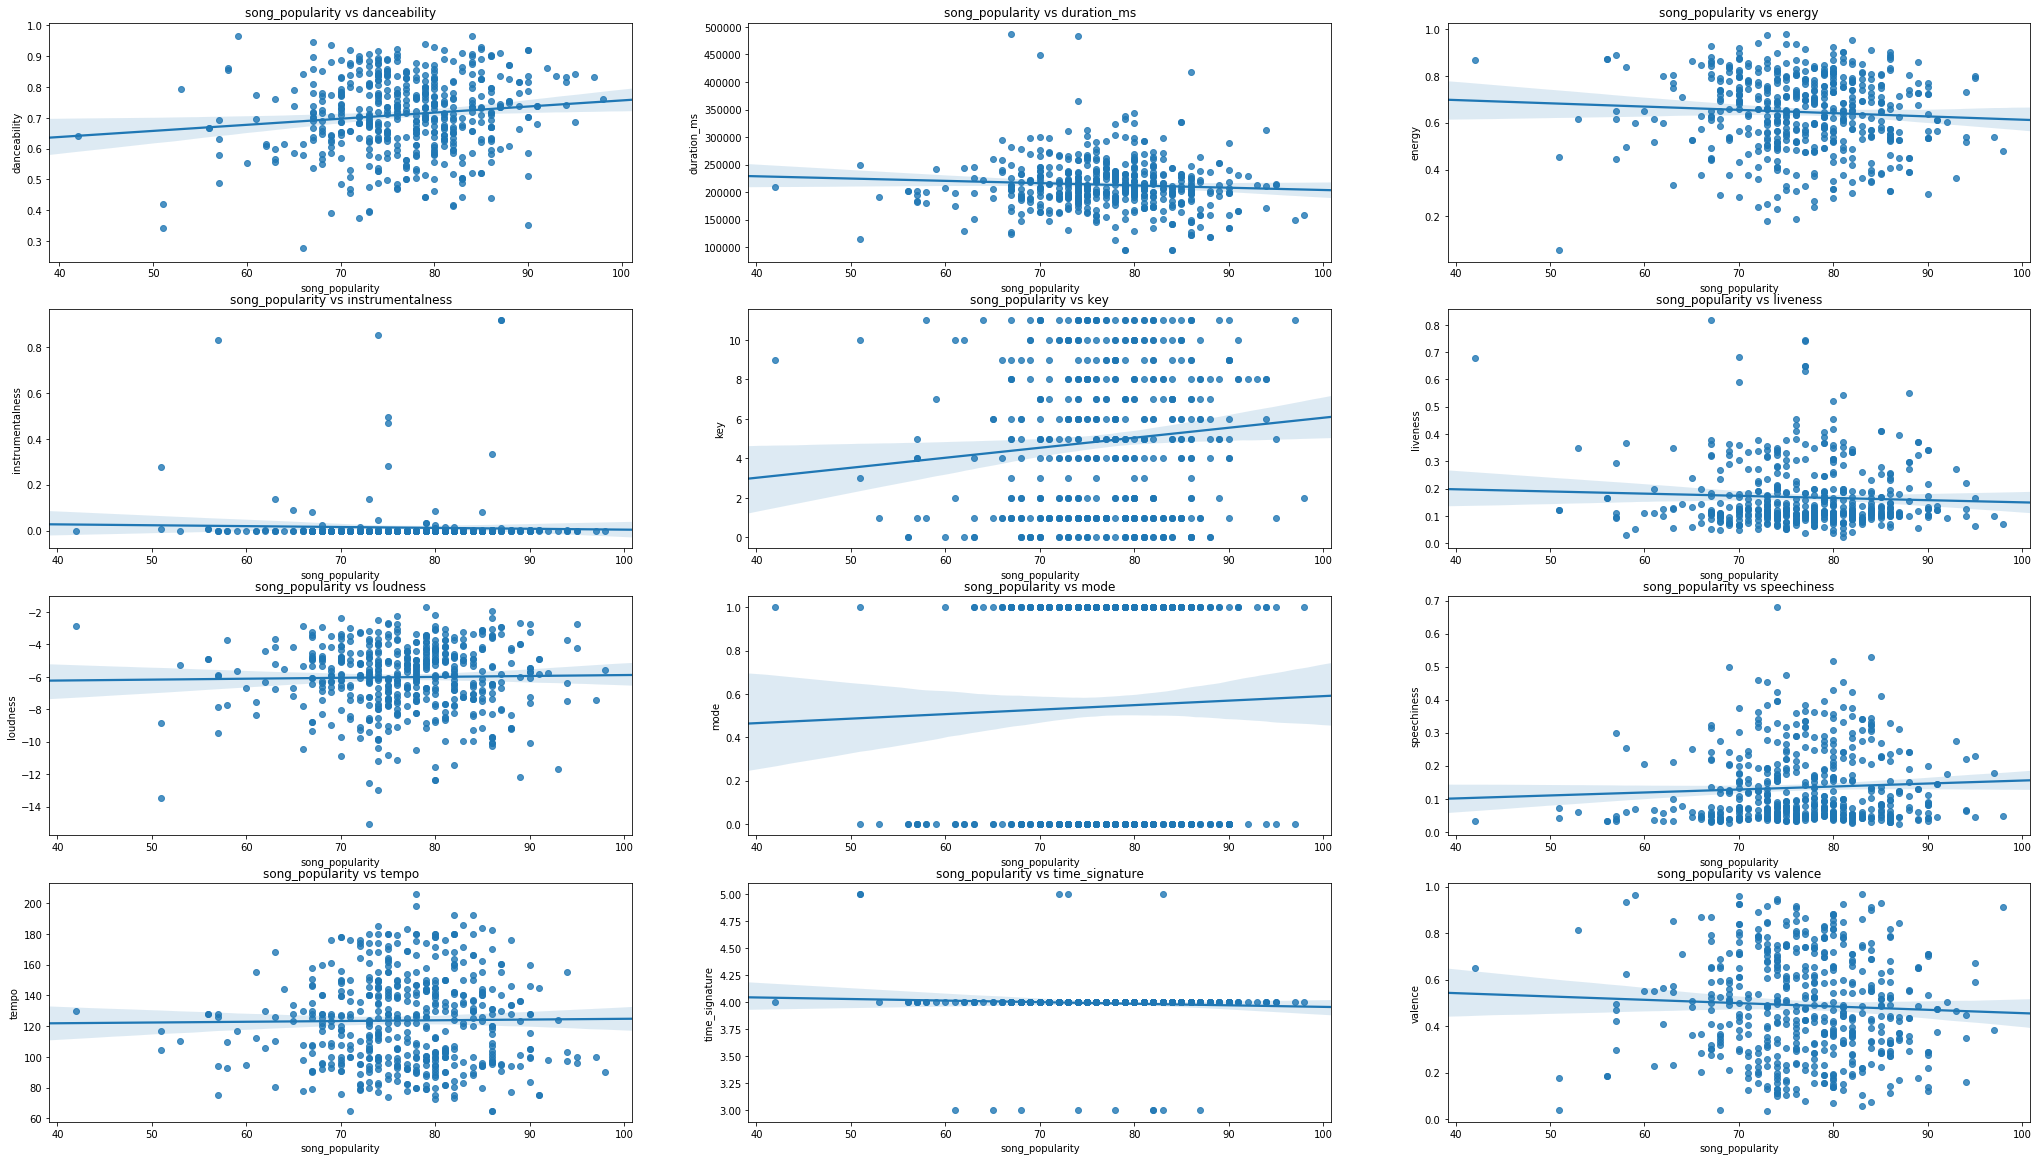

In [11]:
male_subplots = create_subplots_regplot(male_song_features_df,features_to_plot,'male_song_features_correlation.png')

### Start to Visualize and analyize the data 



_it's seems like a good idea to see if the data is within the IQR (interquartile range), to check for outliers. So, we decided to create box plots for the song features to see if the data could be skewed_

<Figure size 432x288 with 0 Axes>

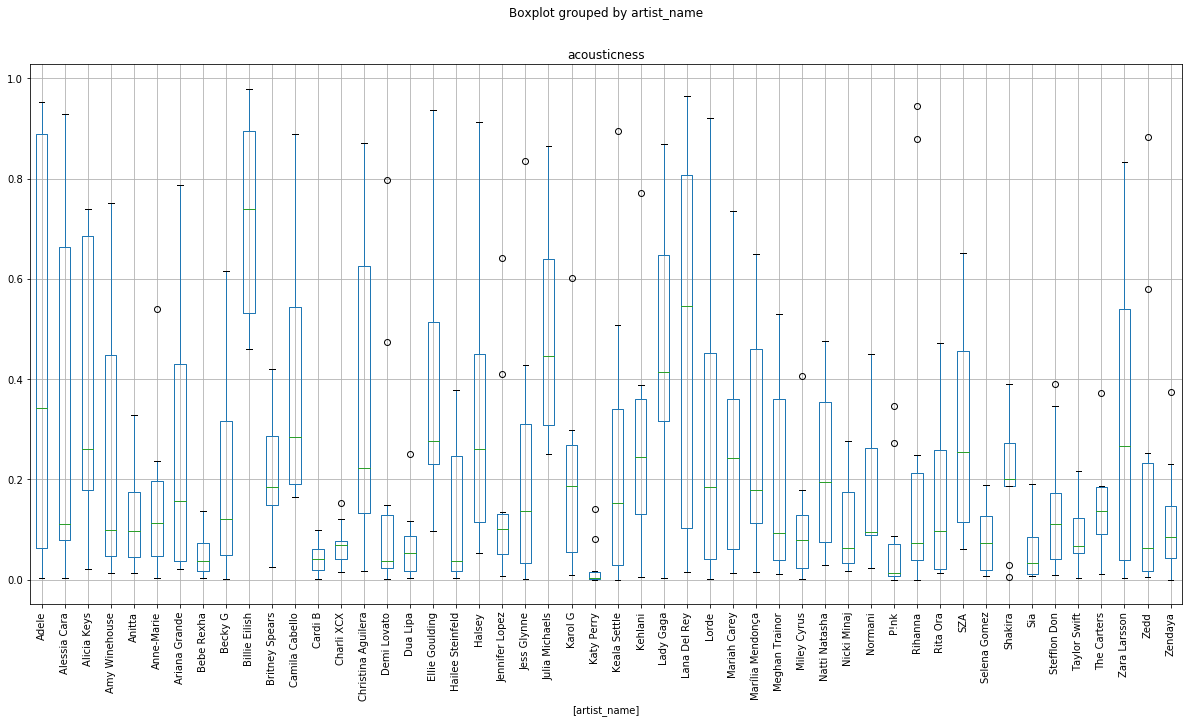

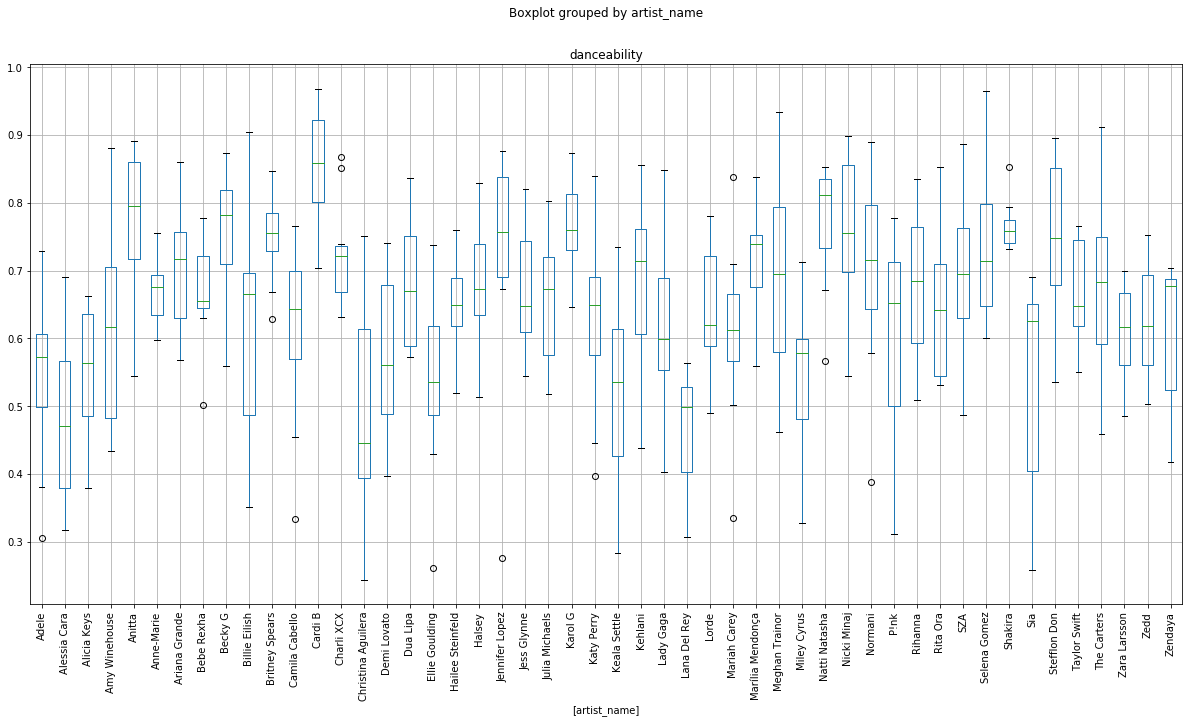

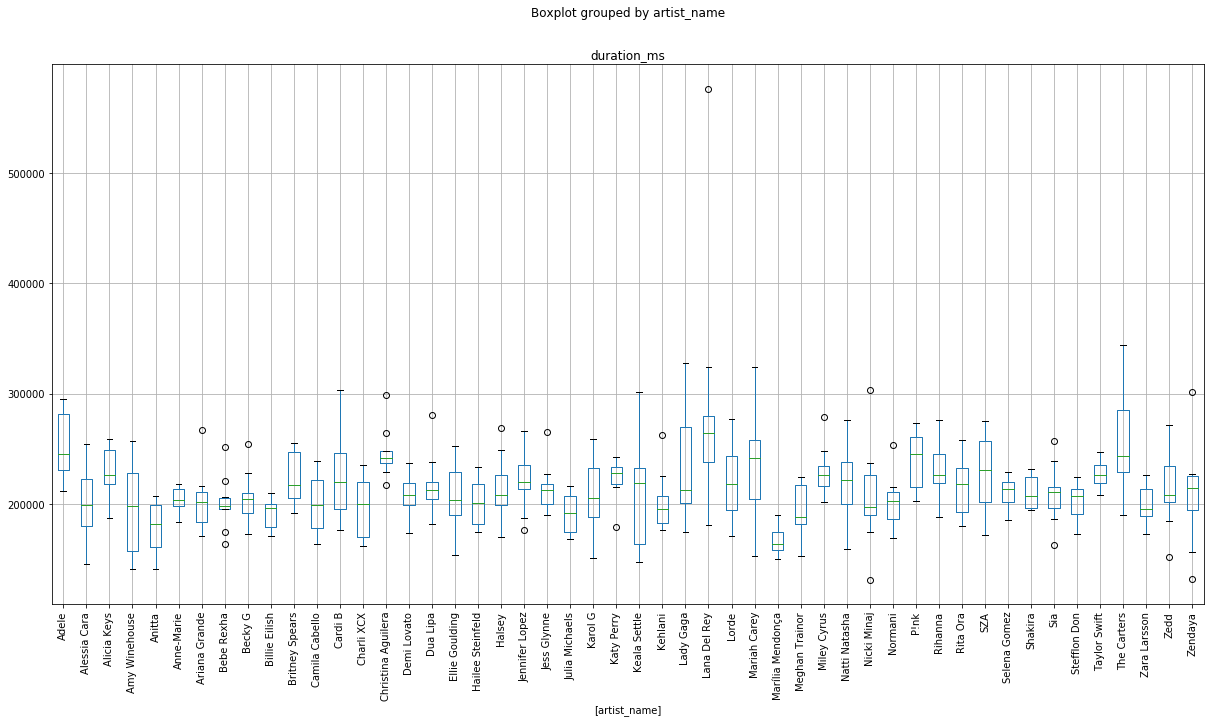

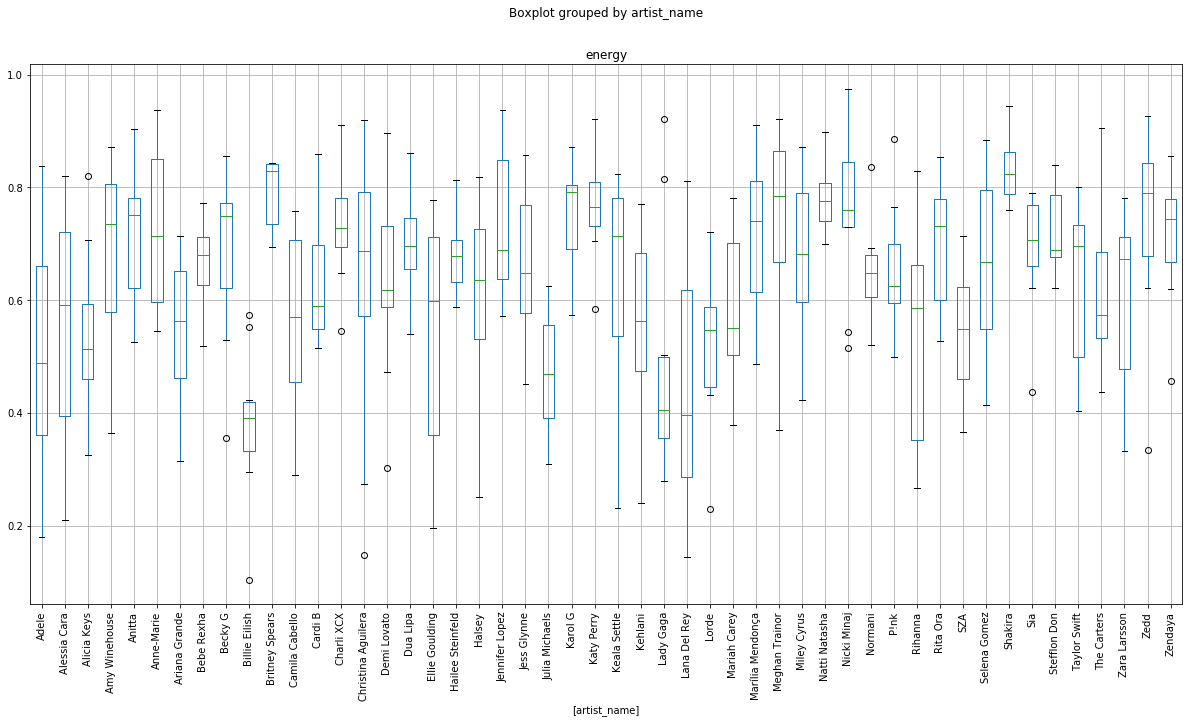

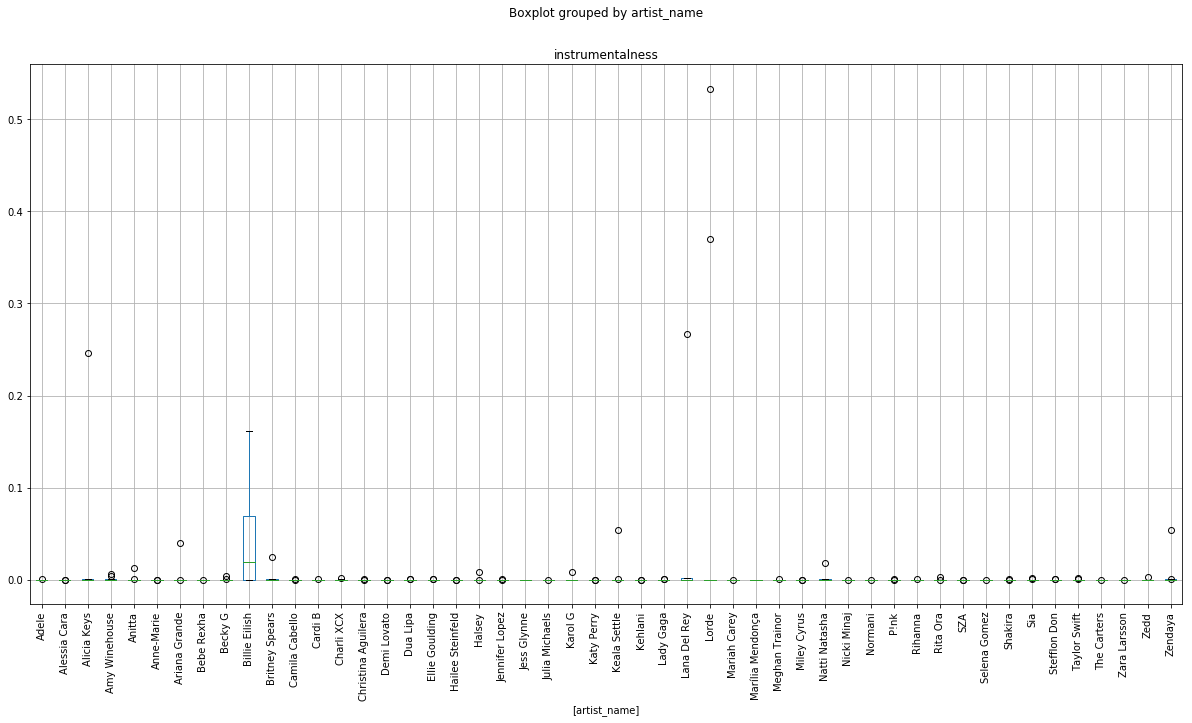

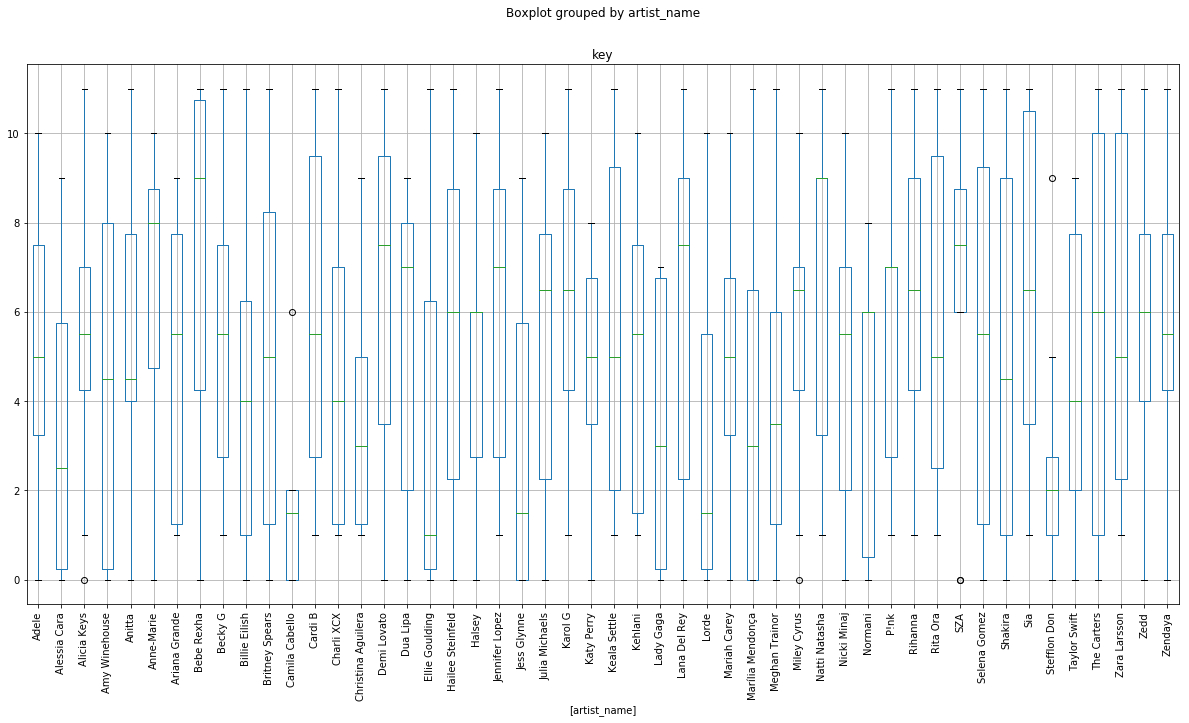

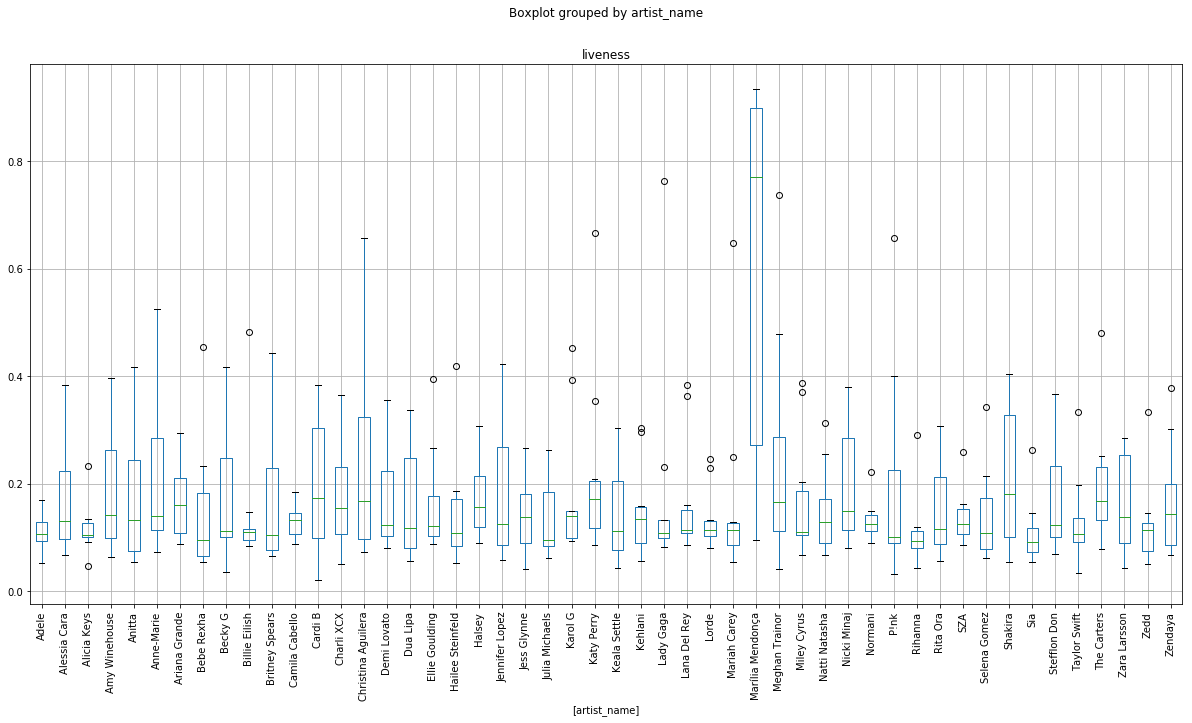

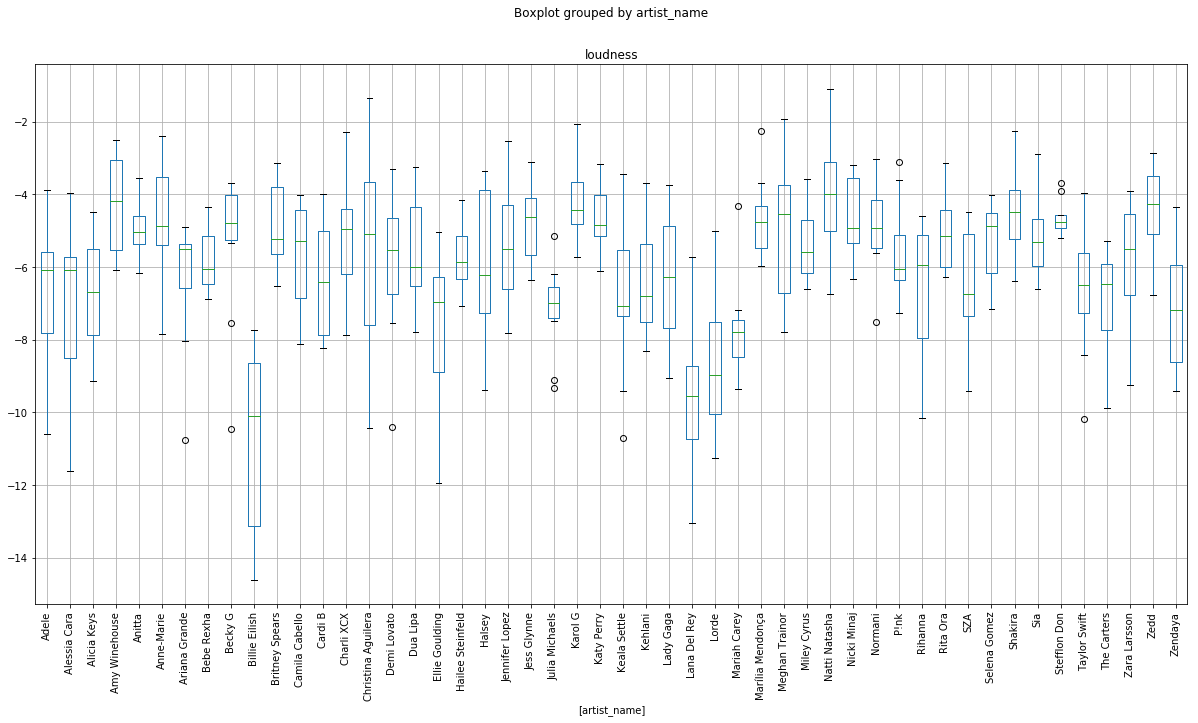

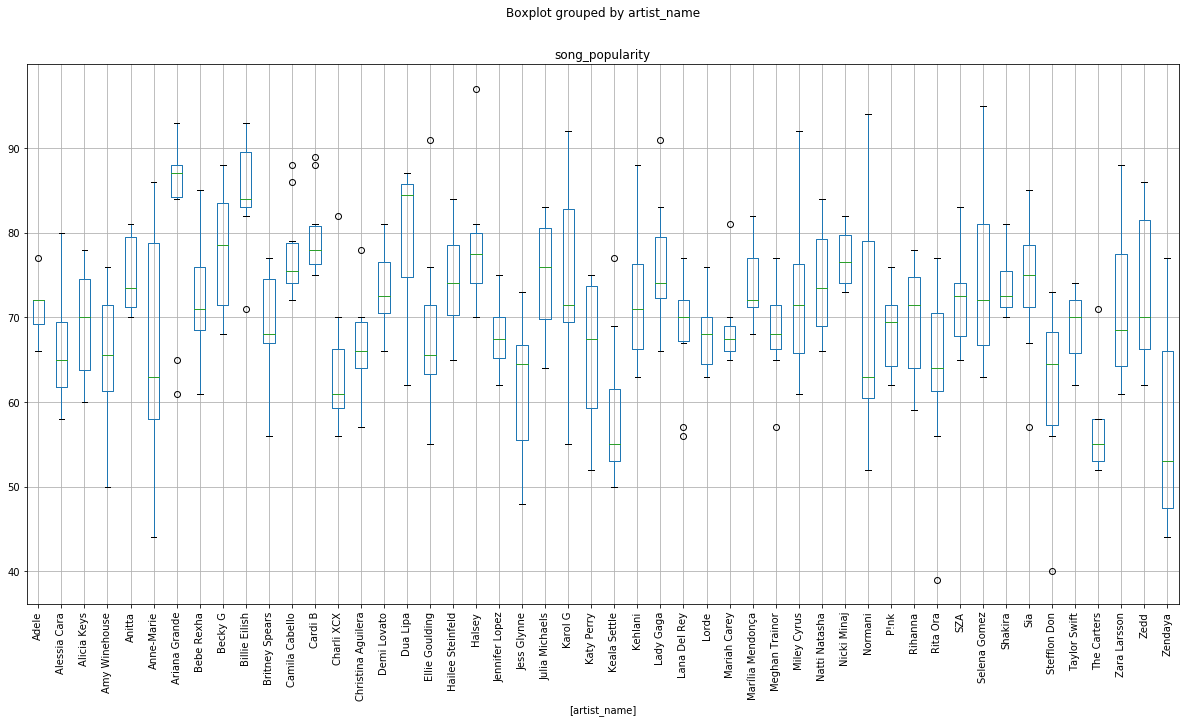

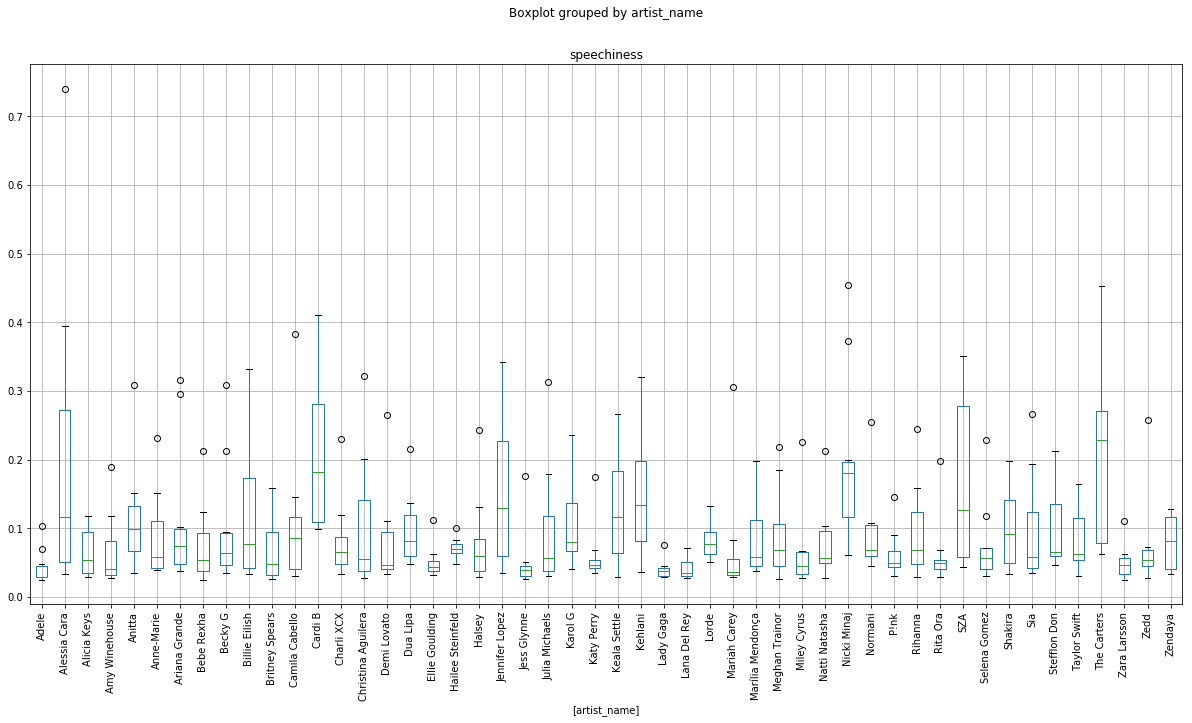

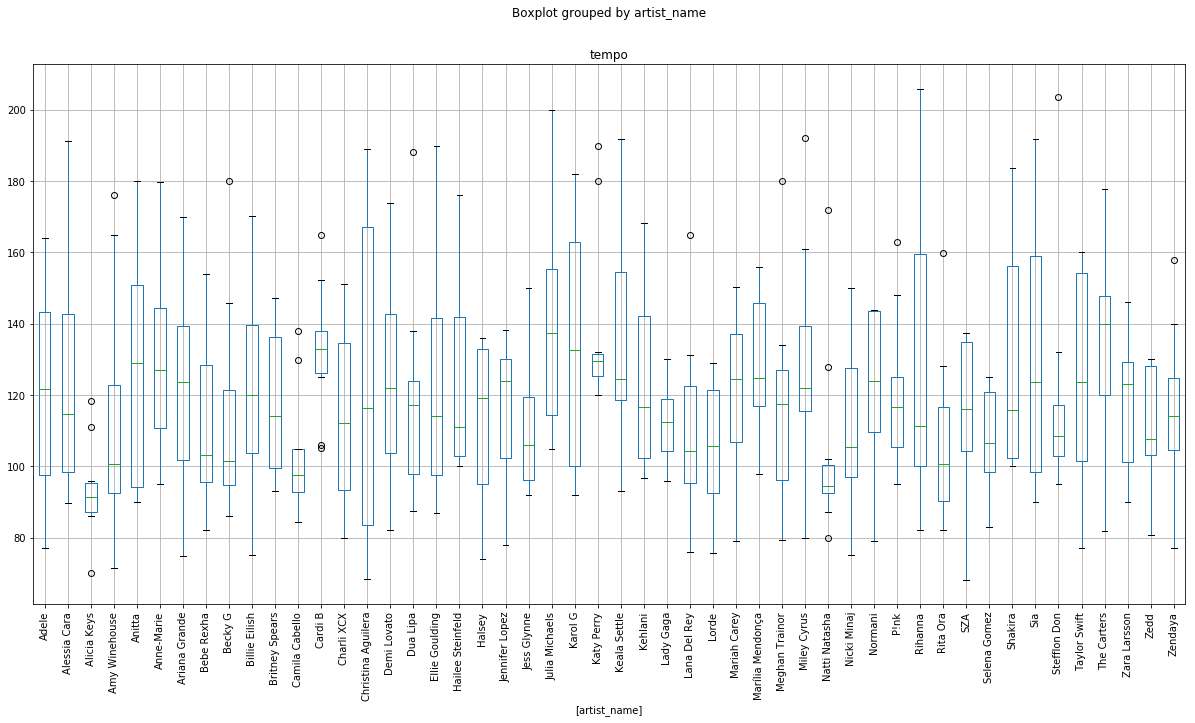

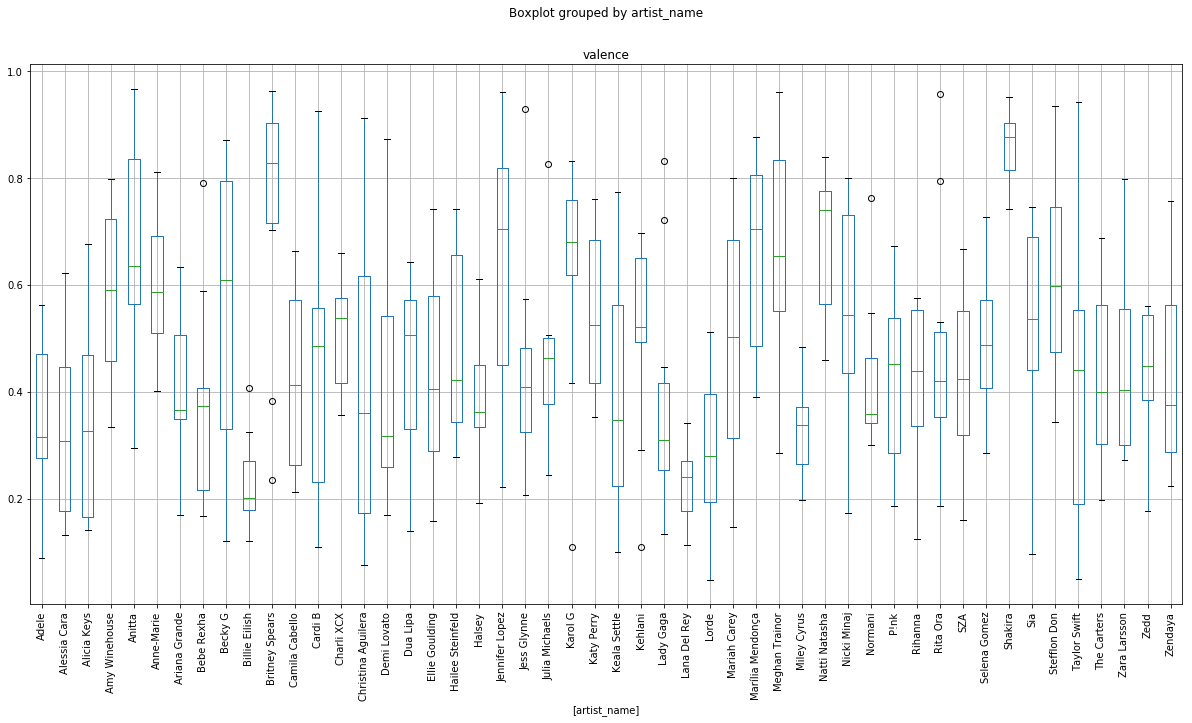

In [16]:
#use the function create_subplots_boxplots() we imported to create box plot charts
#each figure will be for one attribute with a box for each artist to look for the presence
#of outliers

# def create_subplots_boxplots(df,column_names):   
#     '''
#     Function to create sub-distplots from a given DataFrame and specified 
#     columns. You pass the DataFrame, the list of column names, and the name
#     of the png file it will be saved as.
#     '''
#     fig = plt.figure()
#     fig.subplots_adjust(hspace=0.4, wspace=0.2)
#     col_len = len(column_names)
#     for i in column_names:
#         #ax = fig.add_subplot(col_len, 1, column_names.index(i)+1)
#         song_features_df[[i,'artist_name']].boxplot(by='artist_name', figsize=(20,10))
#         plt.xticks(rotation=90)
#         #fig.subplots_adjust(hspace=0.2)
#     #fig.savefig(png_name)
#     plt.show()


col_names_box = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness',
       'song_popularity', 'speechiness', 'tempo', 'valence']

create_subplots_boxplots(female_song_features_df,col_names_box) #we exculded some columns such as key

<Figure size 432x288 with 0 Axes>

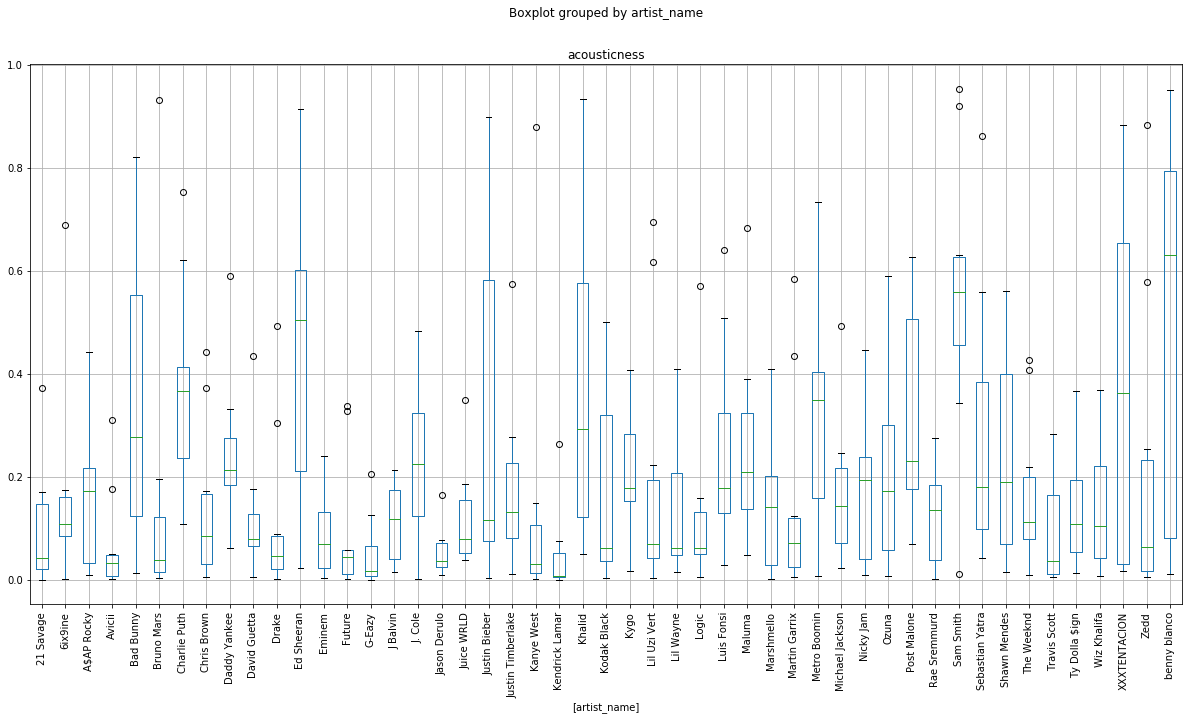

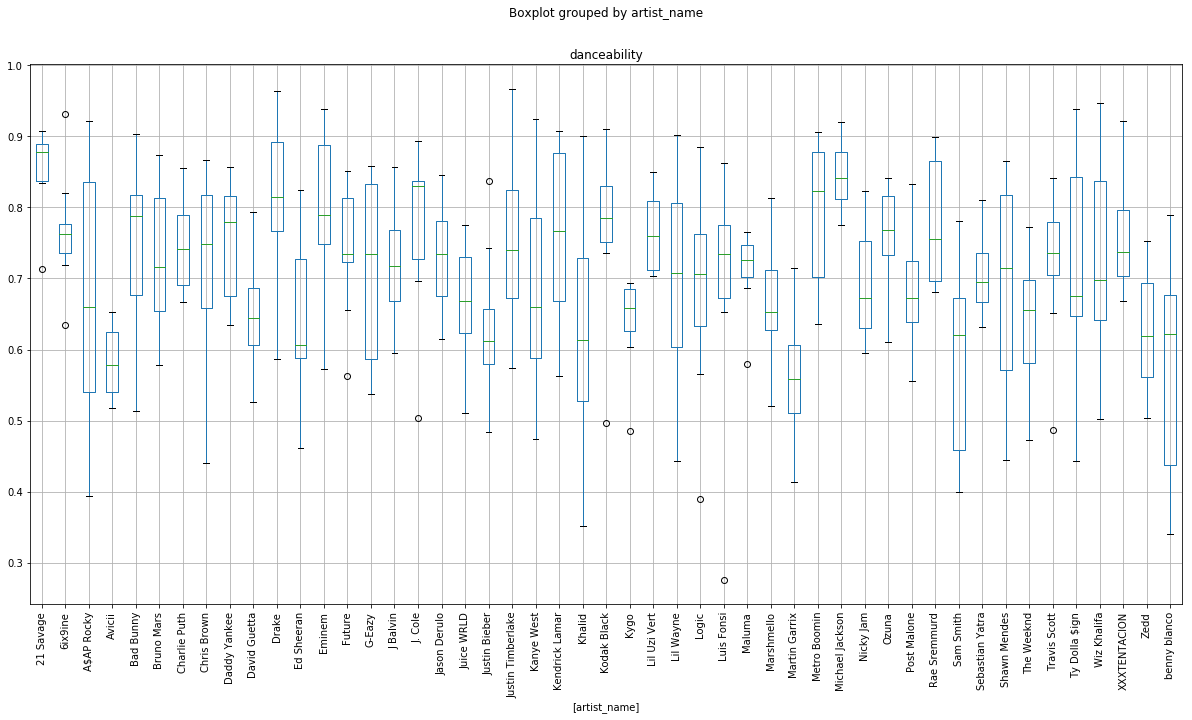

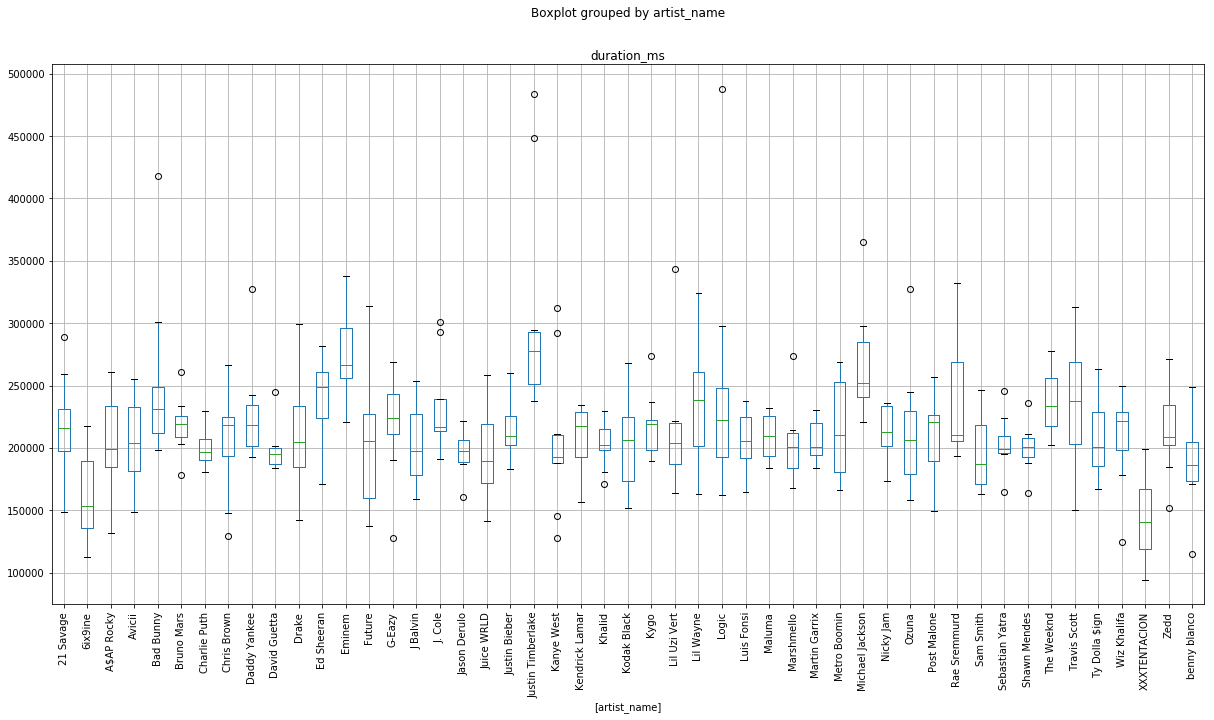

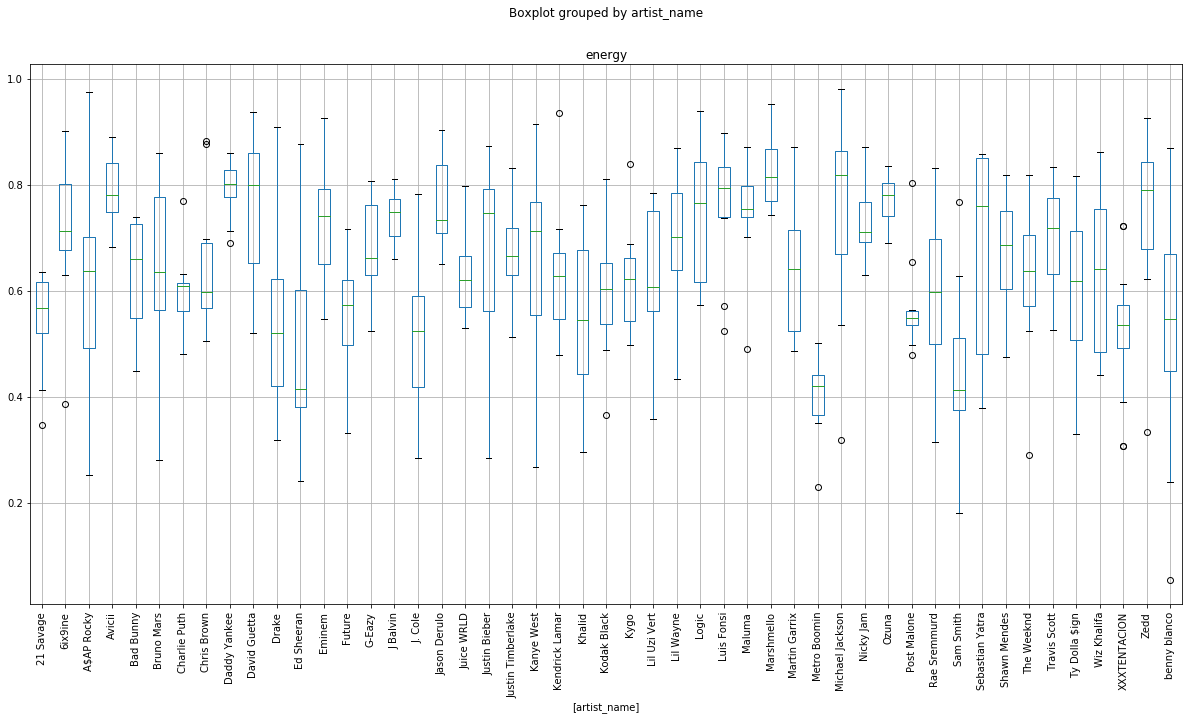

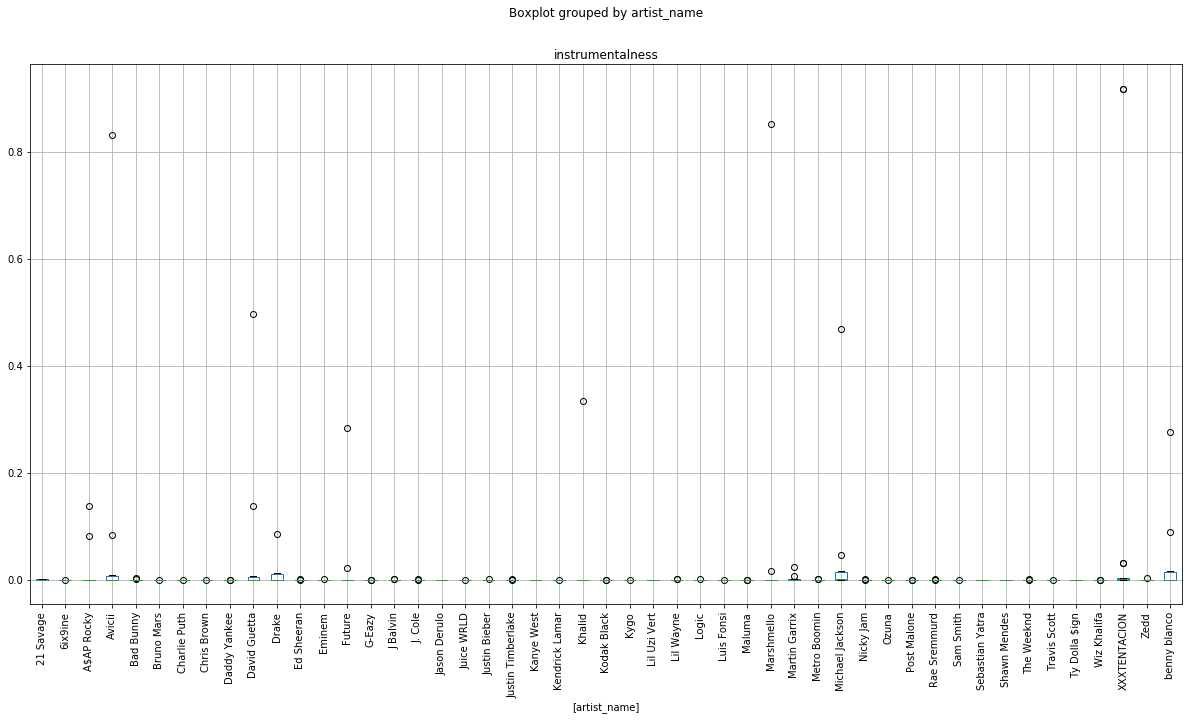

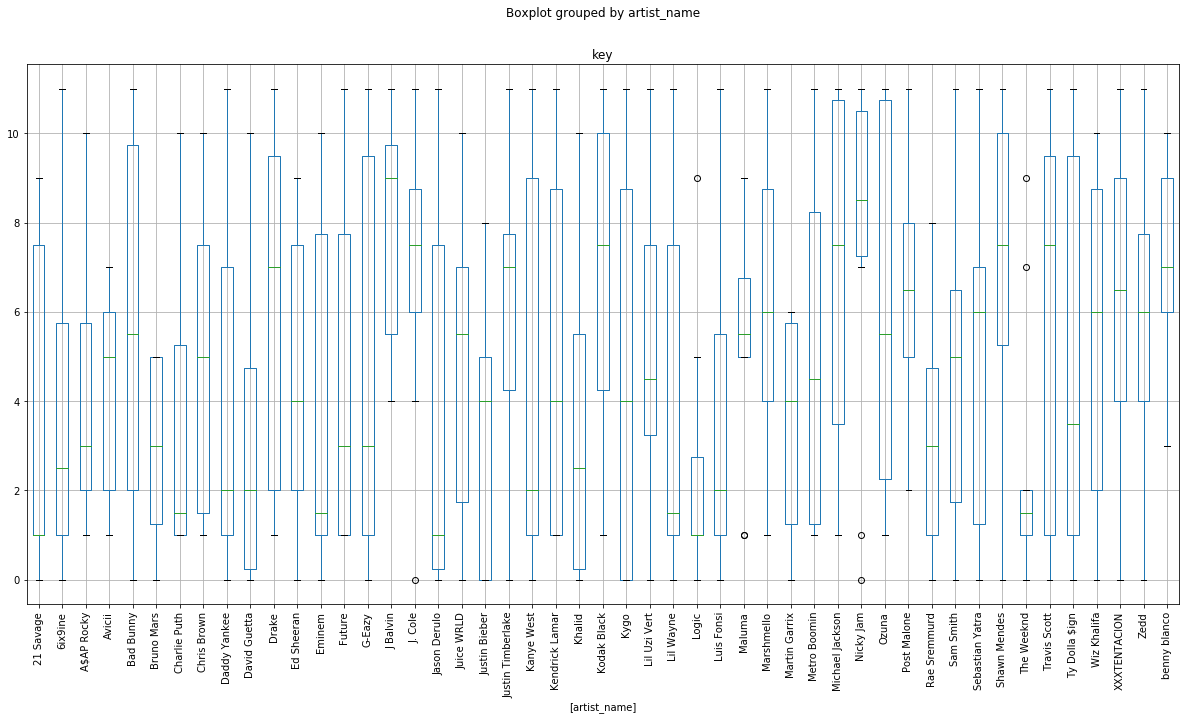

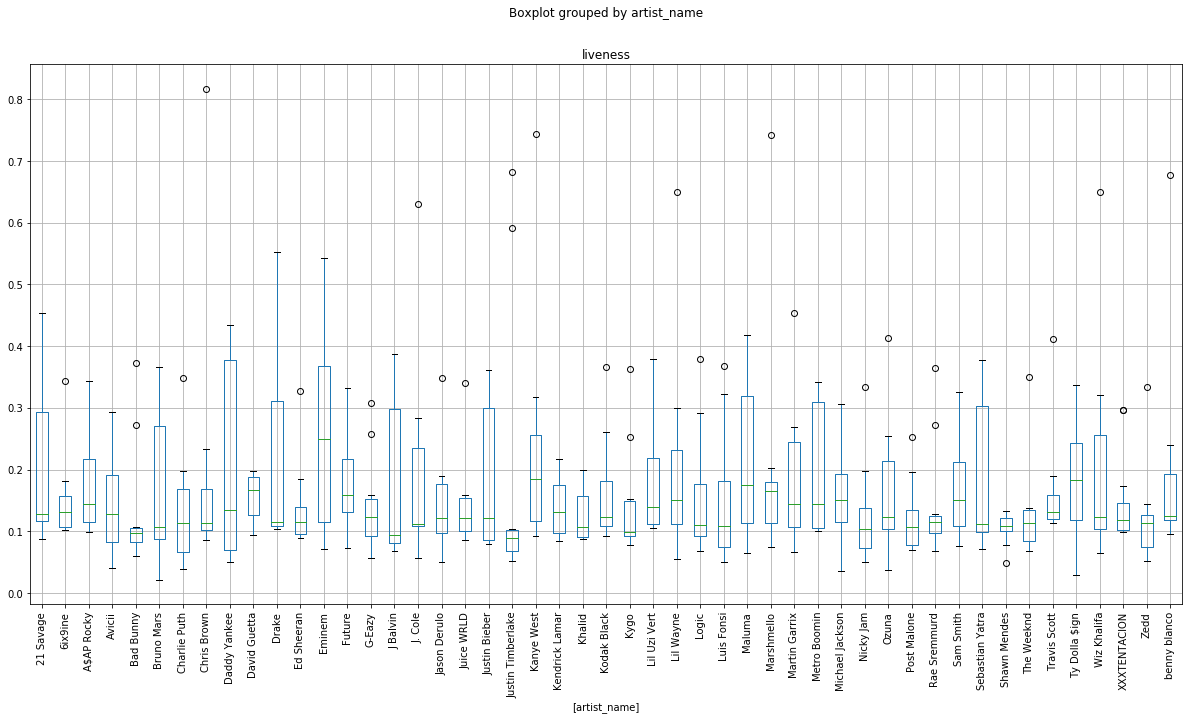

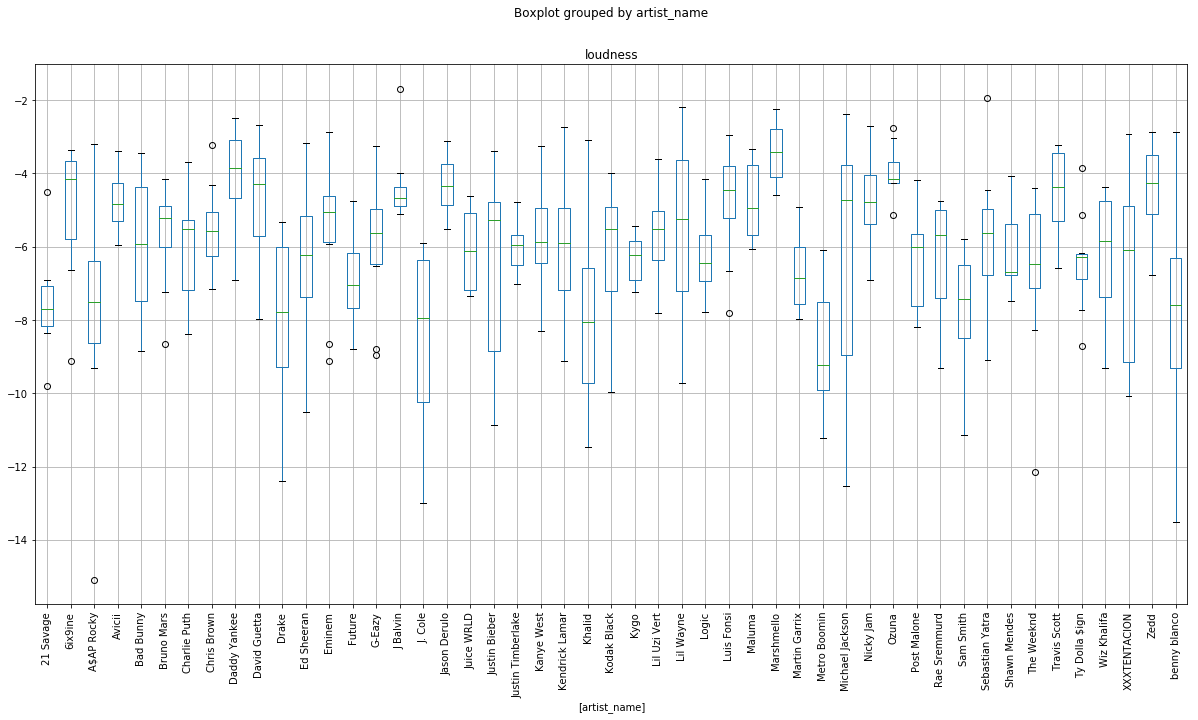

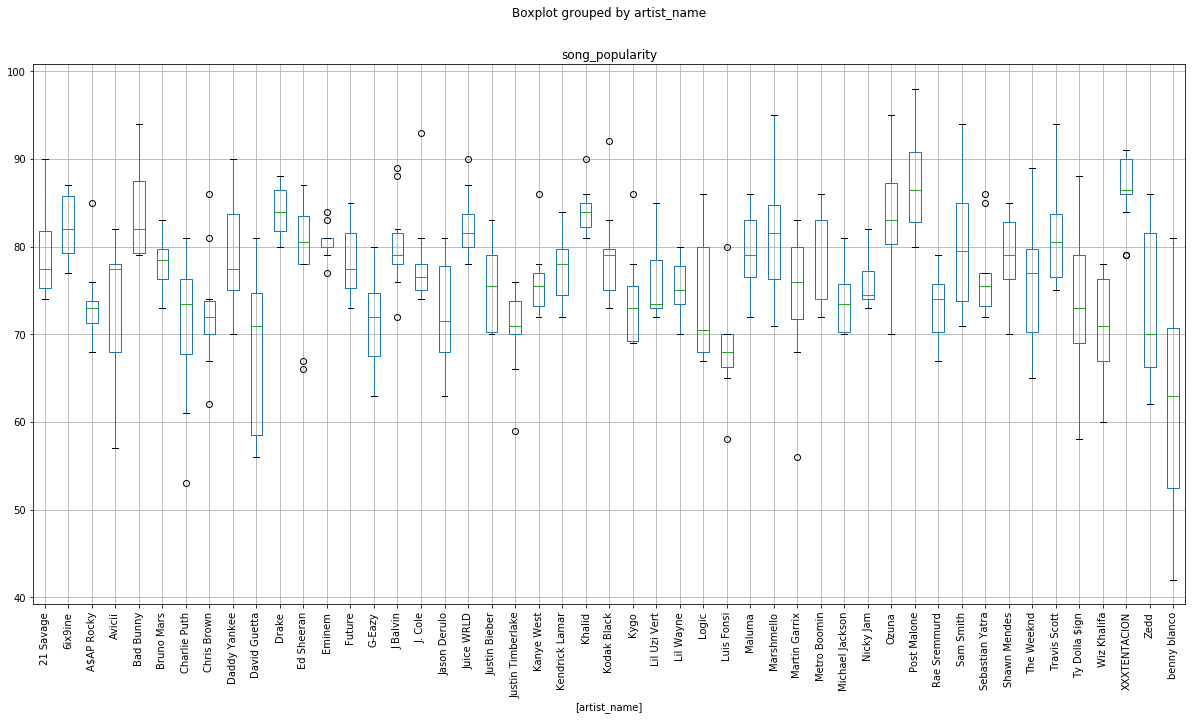

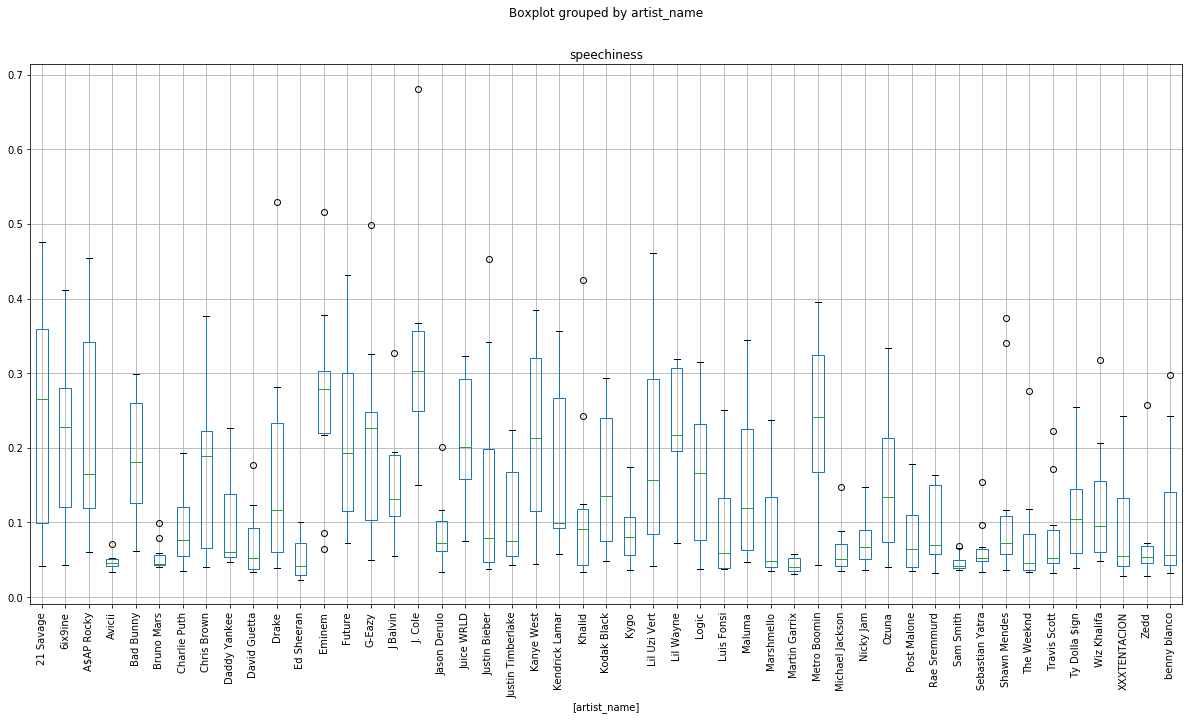

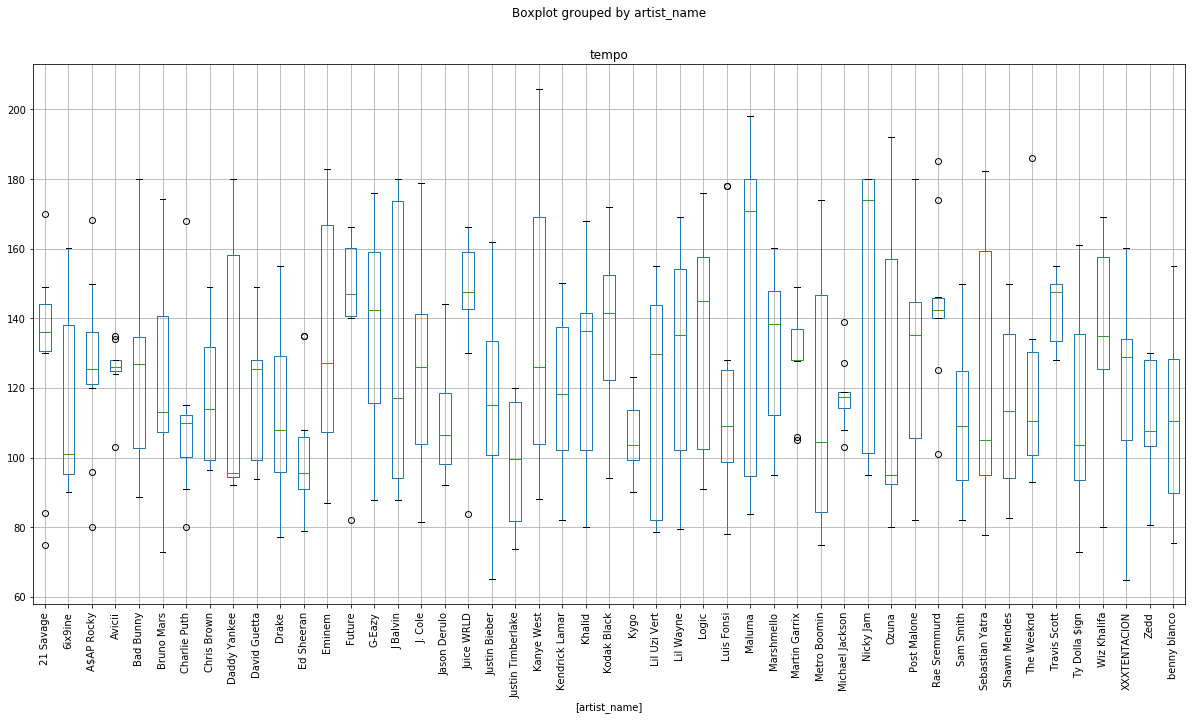

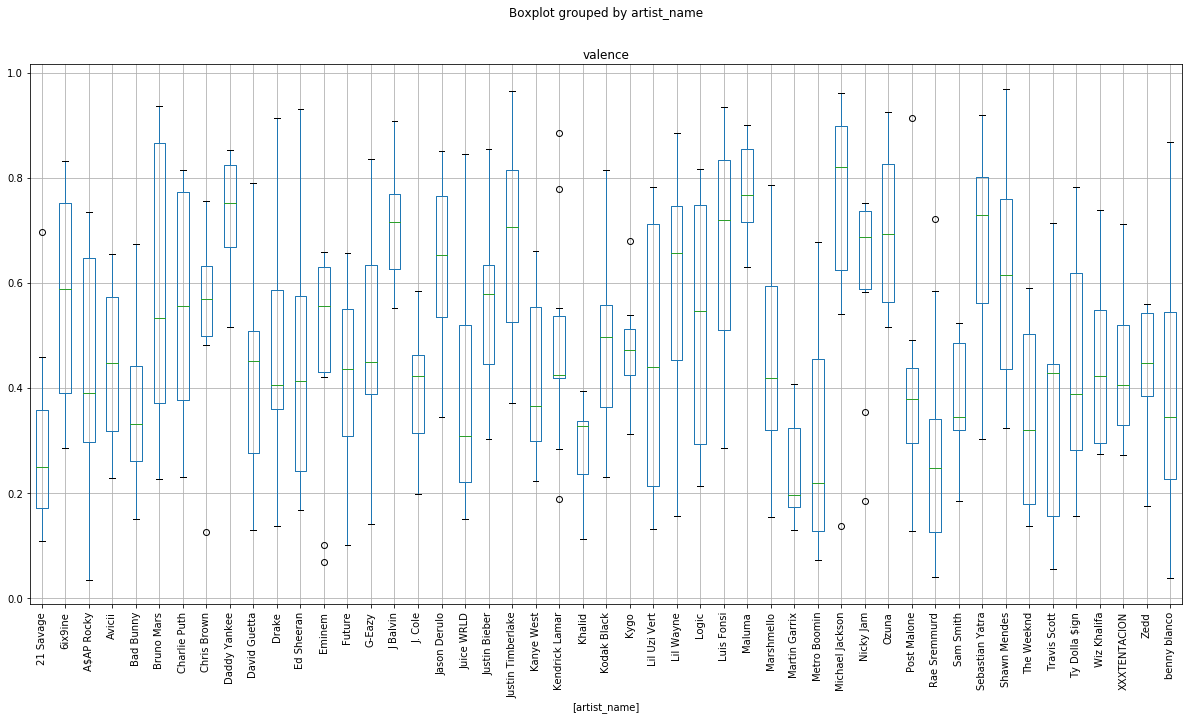

In [17]:
create_subplots_boxplots(male_song_features_df,col_names_box) #we exculded some columns such as key

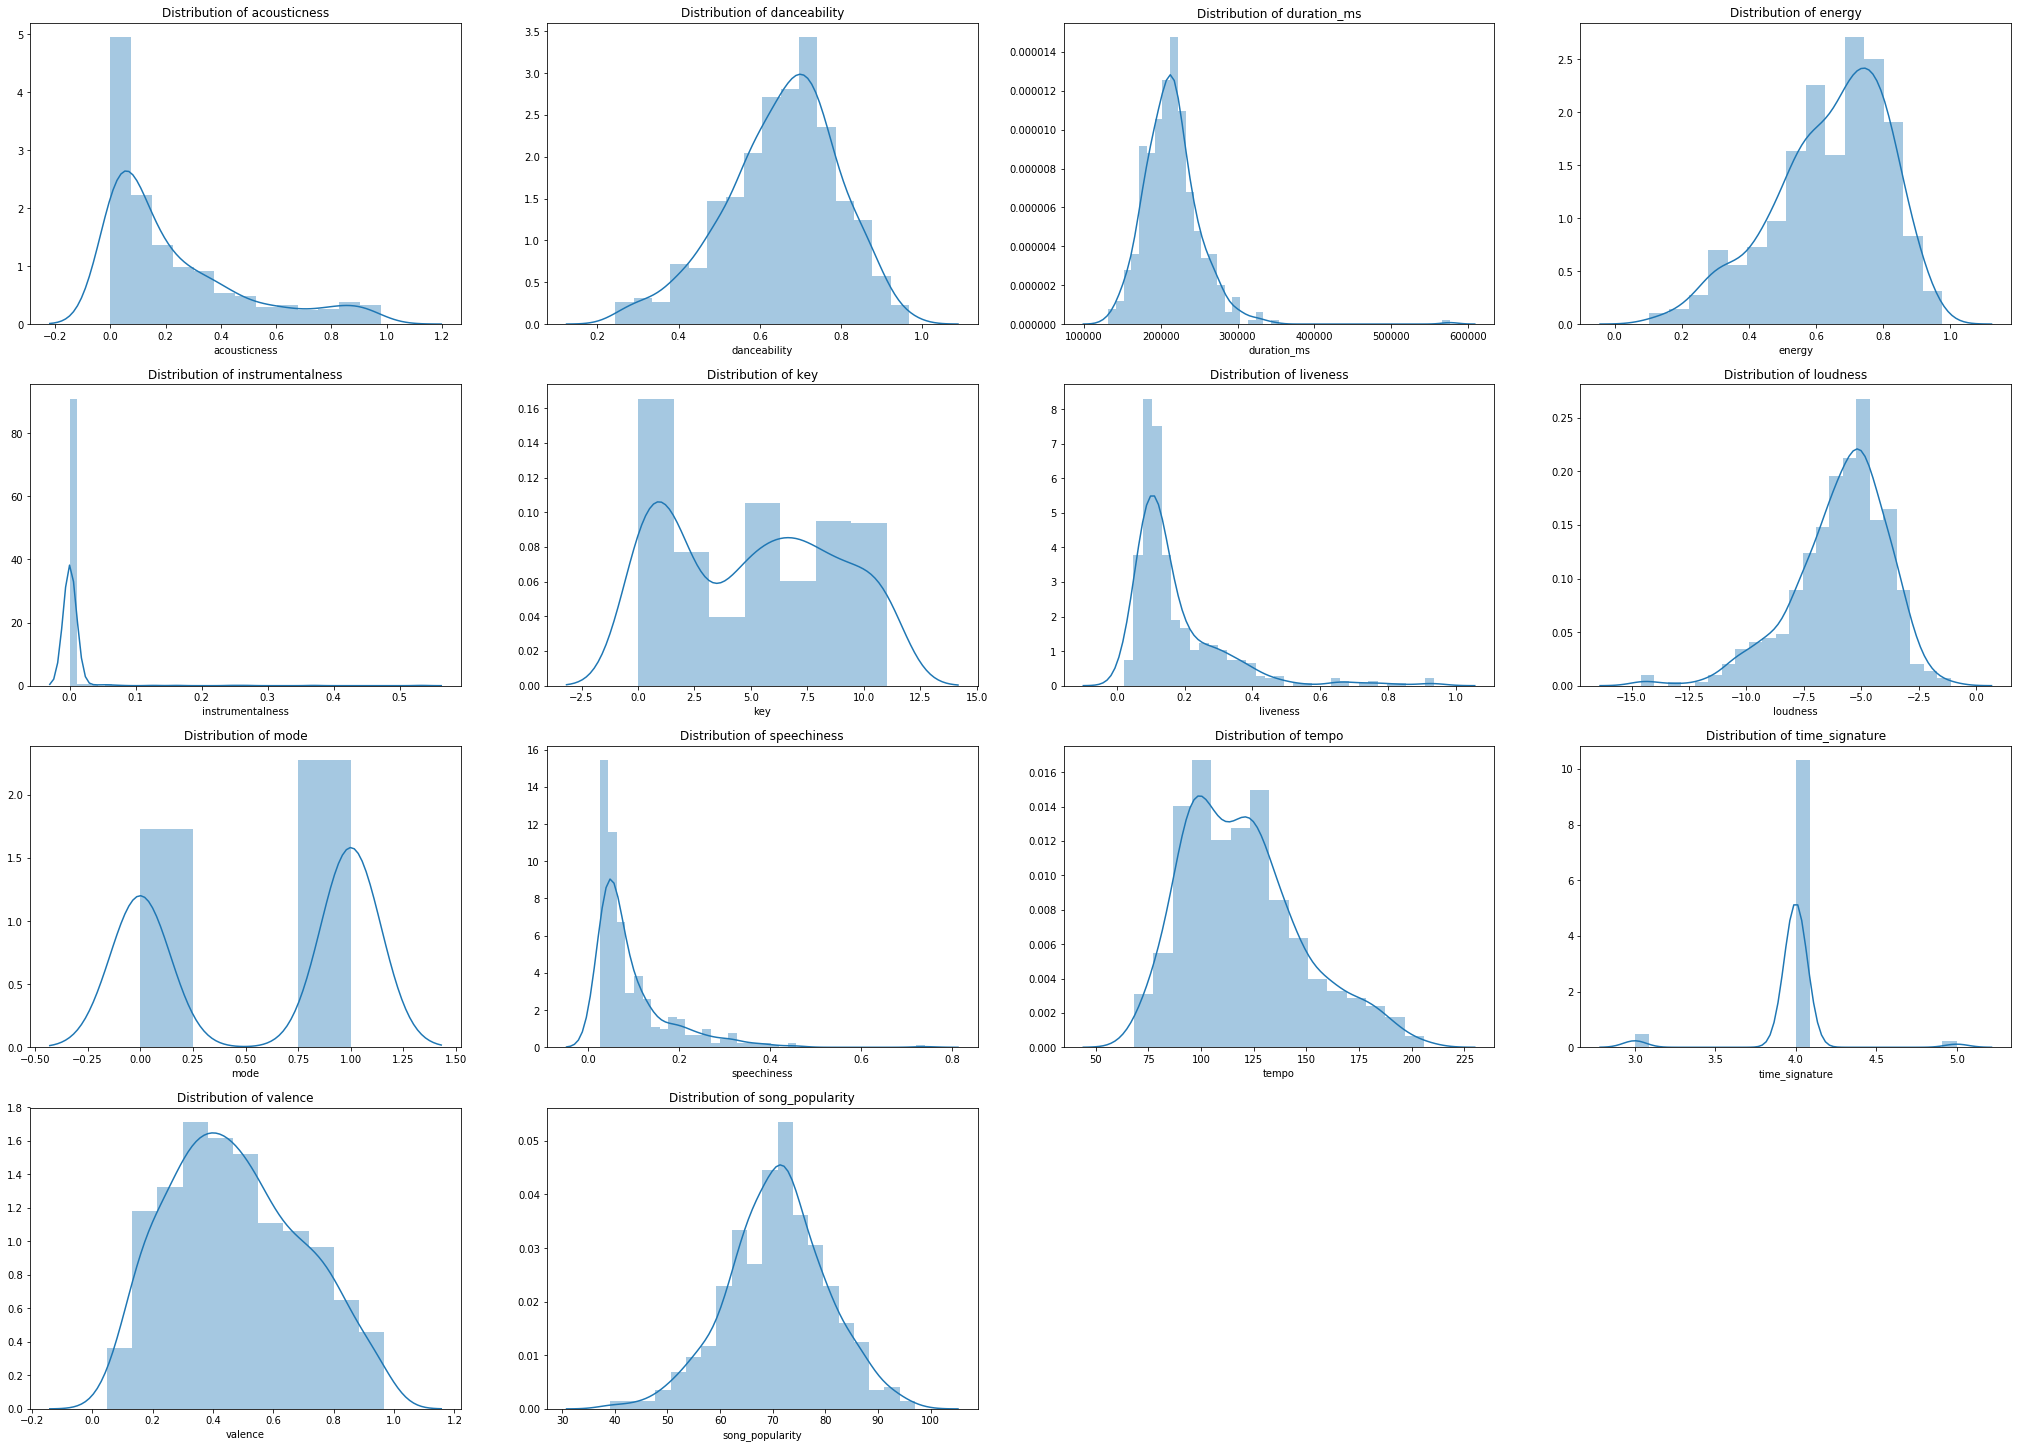

In [19]:
#We will now create all of the distribution plots for the song attributes to 
#get a better understanding of the data. We will use the create_subplots_distplot()
#funtion and pass the df, column names and the png file name

column_names_corr = ['acousticness', 'danceability', 'duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence','song_popularity']
create_subplots_distplot(female_song_features_df,column_names_corr,'Female_Distributions_of_Audio_Features.png')

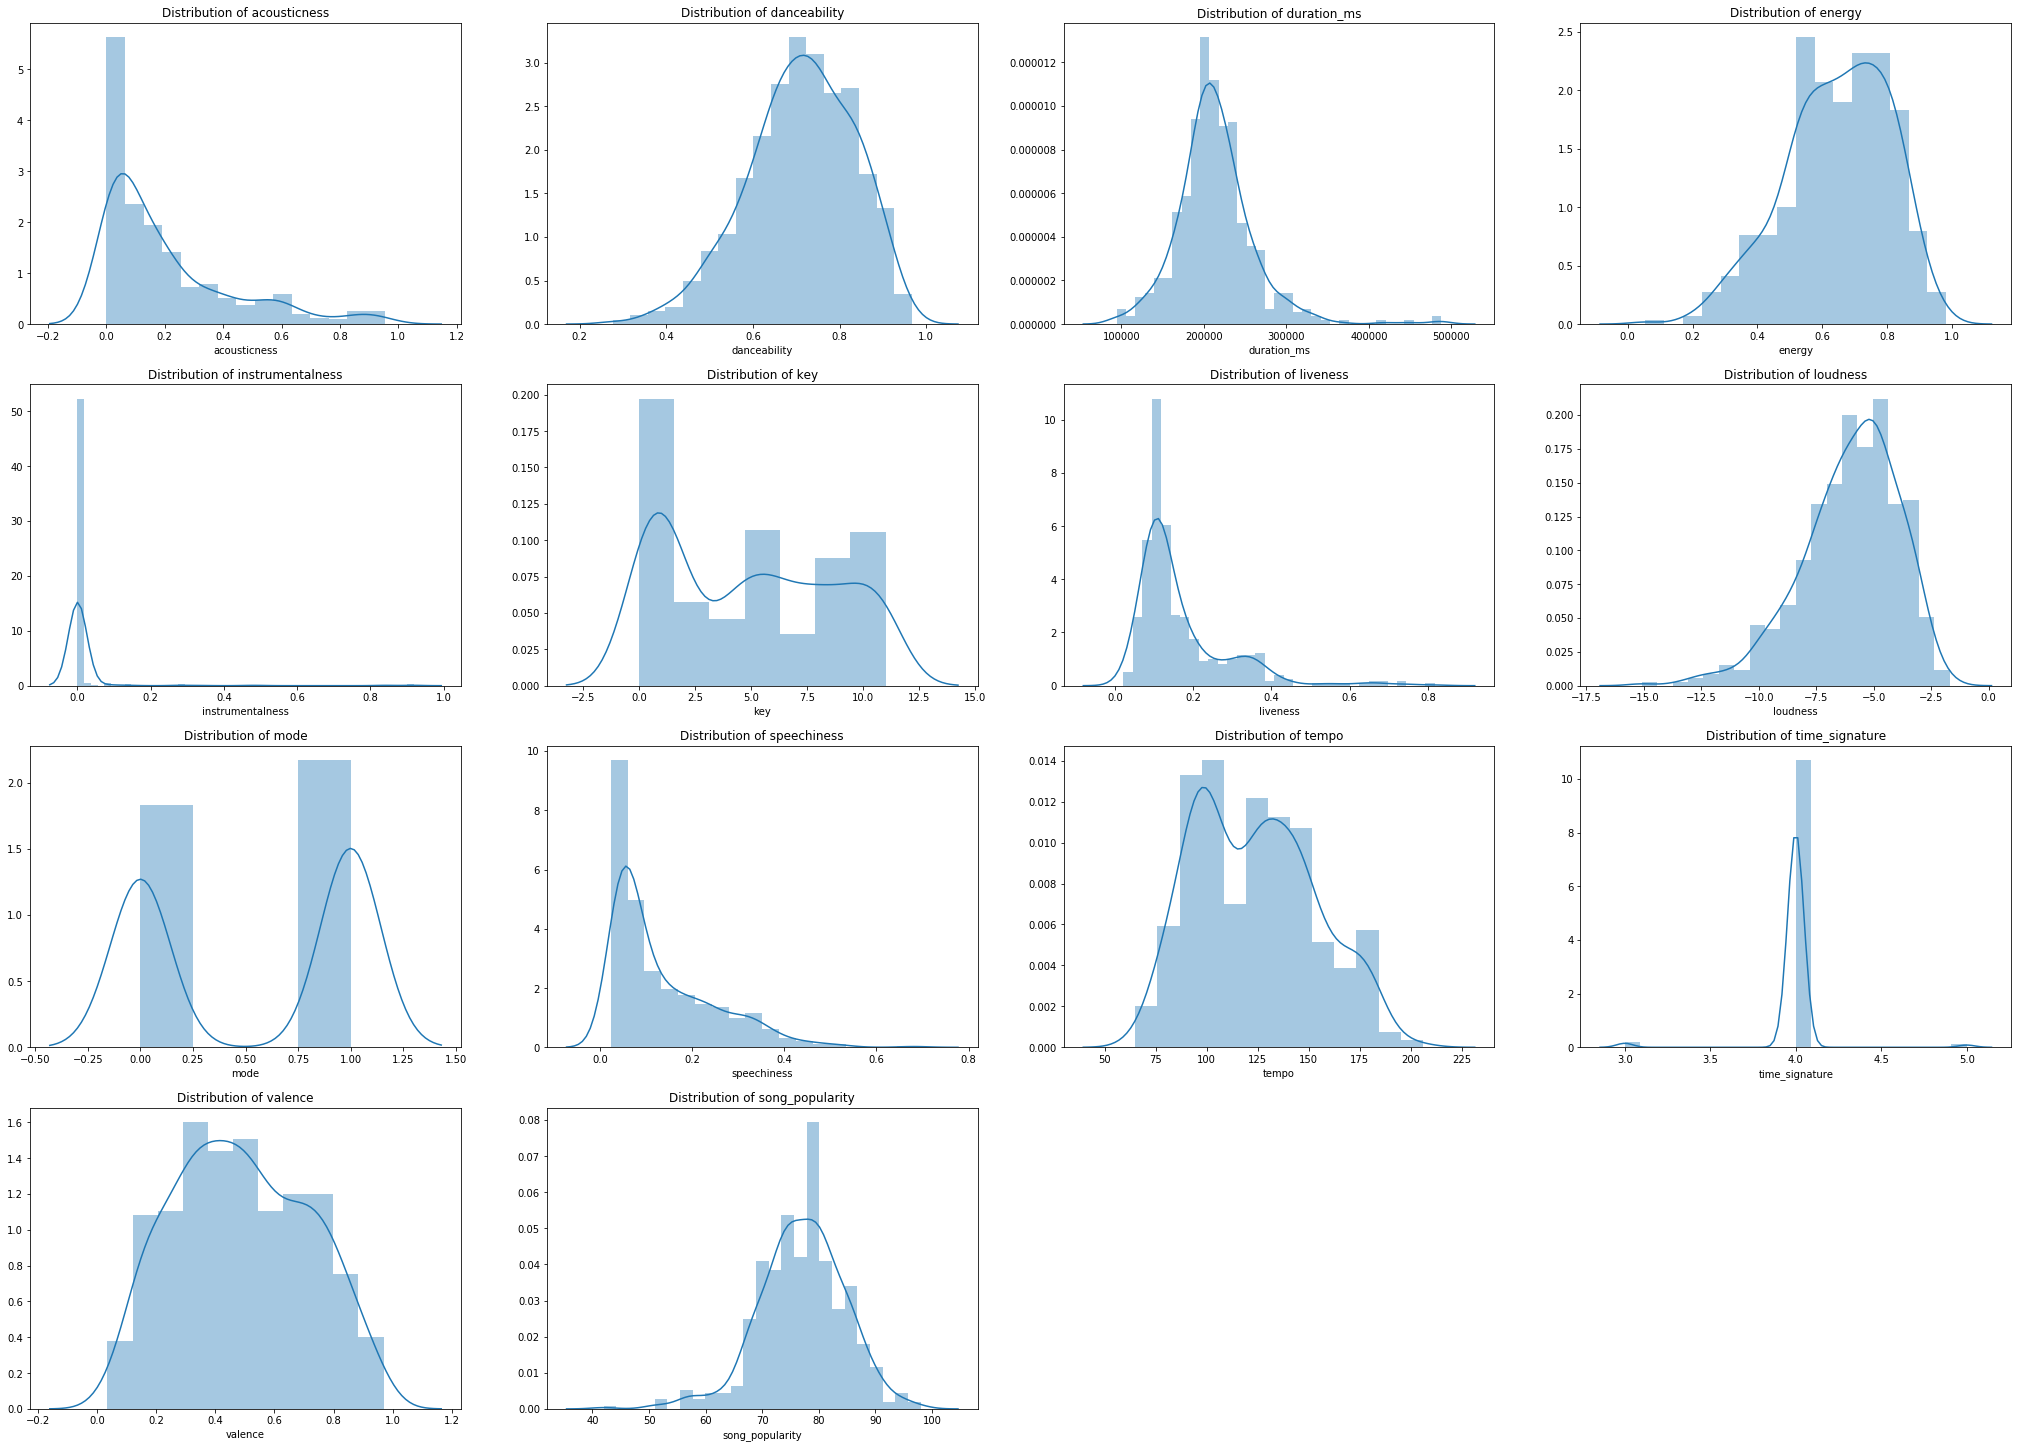

In [20]:
create_subplots_distplot(male_song_features_df,column_names_corr,'Male_Distributions_of_Audio_Features.png')

_here we can see that there isn't really much correlation to the popularity of the song to any audio features. Dancability and accousticness seem to have the most positive relationship, but barely._

_lets use stats from scipy to get a better idea_

In [ ]:
#looked into the slope, intercept, r_value, p_vaue, and standard error to see how good
#stong the correlation is

# slope, intercept, r_value, p_value, std_err = stats.linregress(x=song_features_df["song_popularity"], y=song_features_df["danceability"])
# slope, intercept, r_value, p_value, std_err

_checking the correlation between all of the variables, with special attenion going to their correlation to song popularity_

In [21]:
#run the function .corr() to see the correlation between each column
female_song_features_df.corr()

,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
song_popularity,1.000000,0.069010,0.146415,-0.111720,-0.076975,-0.023227,0.080664,0.023958,-0.046706,-0.133731,0.021863,0.009192,-0.047521,-0.064809
acousticness,0.069010,1.000000,-0.286743,0.031784,-0.658490,0.139660,0.008084,-0.127787,-0.480834,0.141717,-0.122984,-0.111391,-0.199469,-0.263827
danceability,0.146415,-0.286743,1.000000,-0.211525,0.246439,-0.056811,-0.010423,0.039651,0.246972,-0.120026,0.103063,-0.093840,0.115051,0.446008
duration_ms,-0.111720,0.031784,-0.211525,1.000000,-0.081176,0.216049,0.056369,-0.040245,-0.126684,0.034891,-0.084177,0.011215,-0.028226,-0.228662
energy,-0.076975,-0.658490,0.246439,-0.081176,1.000000,-0.069381,0.008846,0.208385,0.723677,-0.120939,0.136780,0.082857,0.227463,0.510228
instrumentalness,-0.023227,0.139660,-0.056811,0.216049,-0.069381,1.000000,-0.015718,-0.041513,-0.221334,0.024487,0.011082,-0.025624,0.067493,-0.114364
key,0.080664,0.008084,-0.010423,0.056369,0.008846,-0.015718,1.000000,-0.090635,-0.038027,-0.200429,0.037917,0.031510,-0.014352,0.008803
liveness,0.023958,-0.127787,0.039651,-0.040245,0.208385,-0.041513,-0.090635,1.000000,0.174649,-0.081626,0.096239,0.038922,0.023271,0.165818
loudness,-0.046706,-0.480834,0.246972,-0.126684,0.723677,-0.221334,-0.038027,0.174649,1.000000,-0.090356,-0.001365,-0.000658,0.196213,0.461460
mode,-0.133731,0.141717,-0.120026,0.034891,-0.120939,0.024487,-0.200429,-0.081626,-0.090356,1.000000,-0.099553,0.076041,-0.061236,-0.086427


In [22]:
male_song_features_df.corr()

,song_popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
song_popularity,1.000000,0.058930,0.122357,-0.067462,-0.065907,-0.033297,0.103462,-0.051257,0.020386,0.031671,0.061934,0.012445,-0.066087,-0.048477
acousticness,0.058930,1.000000,-0.213565,-0.067410,-0.458532,0.063410,0.103610,-0.096959,-0.332973,0.019812,-0.098415,-0.123680,0.012054,-0.045625
danceability,0.122357,-0.213565,1.000000,-0.045501,-0.035763,-0.050181,0.040510,0.000535,0.020958,-0.038789,0.170521,-0.046071,-0.068253,0.257718
duration_ms,-0.067462,-0.067410,-0.045501,1.000000,0.101394,-0.050106,-0.062886,0.115577,0.022597,0.064514,0.009508,-0.016951,-0.068950,-0.034188
energy,-0.065907,-0.458532,-0.035763,0.101394,1.000000,0.026150,-0.005965,0.146475,0.748502,-0.053242,-0.062079,0.102073,0.043678,0.398852
instrumentalness,-0.033297,0.063410,-0.050181,-0.050106,0.026150,1.000000,-0.008659,-0.002749,0.050406,-0.057107,-0.106631,0.053649,0.047615,-0.099575
key,0.103462,0.103610,0.040510,-0.062886,-0.005965,-0.008659,1.000000,0.003073,0.016766,-0.161875,0.031788,-0.010751,0.040382,0.145254
liveness,-0.051257,-0.096959,0.000535,0.115577,0.146475,-0.002749,0.003073,1.000000,0.099620,-0.019385,0.050470,0.007624,0.005241,0.067778
loudness,0.020386,-0.332973,0.020958,0.022597,0.748502,0.050406,0.016766,0.099620,1.000000,-0.052637,-0.145248,0.074674,-0.028401,0.351825
mode,0.031671,0.019812,-0.038789,0.064514,-0.053242,-0.057107,-0.161875,-0.019385,-0.052637,1.000000,0.014354,0.026468,-0.019982,-0.059082


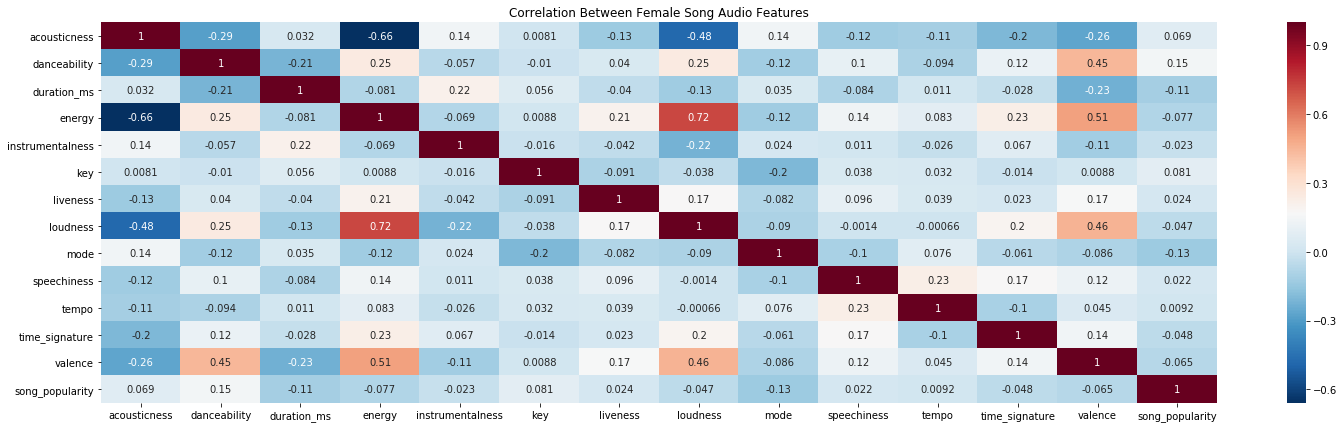

In [23]:
#next created a heatmap to be able to see the relationship between these easier
#passed a list of the columns we want, then plot and save the file

column_names_corr = ['acousticness', 'danceability', 'duration_ms',
                  'energy','instrumentalness','key','liveness',
                  'loudness','mode','speechiness','tempo',
                  'time_signature','valence','song_popularity']
female_song_features_heatmap = plt.figure(figsize = (25,7))
female_ax = sns.heatmap(female_song_features_df[column_names_corr].corr(), cmap="RdBu_r", annot=True).set_title('Correlation Between Female Song Audio Features')
female_song_features_heatmap.savefig('female_song_features_heatmap.png')


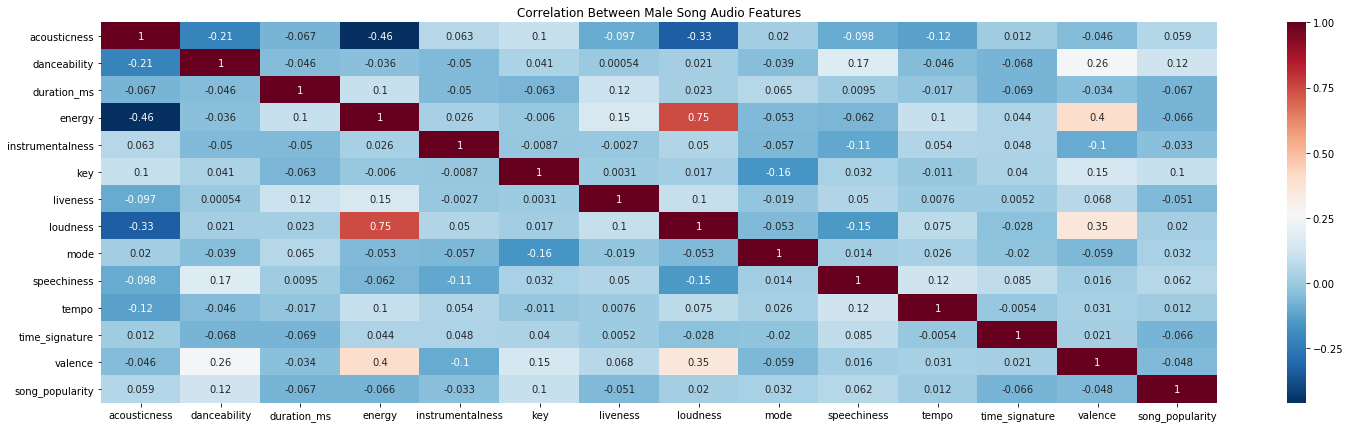

In [24]:
male_song_features_heatmap = plt.figure(figsize = (25,7))
male_ax = sns.heatmap(male_song_features_df[column_names_corr].corr(), cmap="RdBu_r", annot=True).set_title('Correlation Between Male Song Audio Features')
male_song_features_heatmap.savefig('male_song_features_heatmap.png')


_Since there doesn't seem to be too much of a connection between the audio features and song populatity, we decided to take the mean values of these features and take a look._ 

In [25]:
# #list_of_names = top_songs['artist_name'].values

# def mean_of_artist_columns_to_df(artists,song_df): 
#     values = []
#     for i in artists:
#         the_mean = song_df[song_df['artist_name'] == i].mean()
#         values.append(np.append(i, the_mean.values))
#     column_name = np.append('artist_name', the_mean.index)
#     return pd.DataFrame(values, columns=column_name)

In [26]:
#we created a list of the artist names, and then used the function mean_of_artist_columns_to_df
#once we had the new df, we converted the correct columns to numeric values

female_artist_names = female_artists_attributes['name'].values
female_mean_song_attri = mean_of_artist_columns_to_df(female_artist_names,female_song_features_df)
female_mean_song_attri.to_csv('female_mean_song_attributes.csv')
col_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence']
female_mean_song_attri[col_names] = female_mean_song_attri[col_names].apply(pd.to_numeric)

male_artist_names = male_artists_attributes['name'].values
male_mean_song_attri = mean_of_artist_columns_to_df(male_artist_names,male_song_features_df)
male_mean_song_attri.to_csv('female_mean_song_attributes.csv')
col_names = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence']
male_mean_song_attri[col_names] = male_mean_song_attri[col_names].apply(pd.to_numeric)

_now that we have this new DataFrame of Artists Attributes with their mean song features, we can look fro correlation at this level_

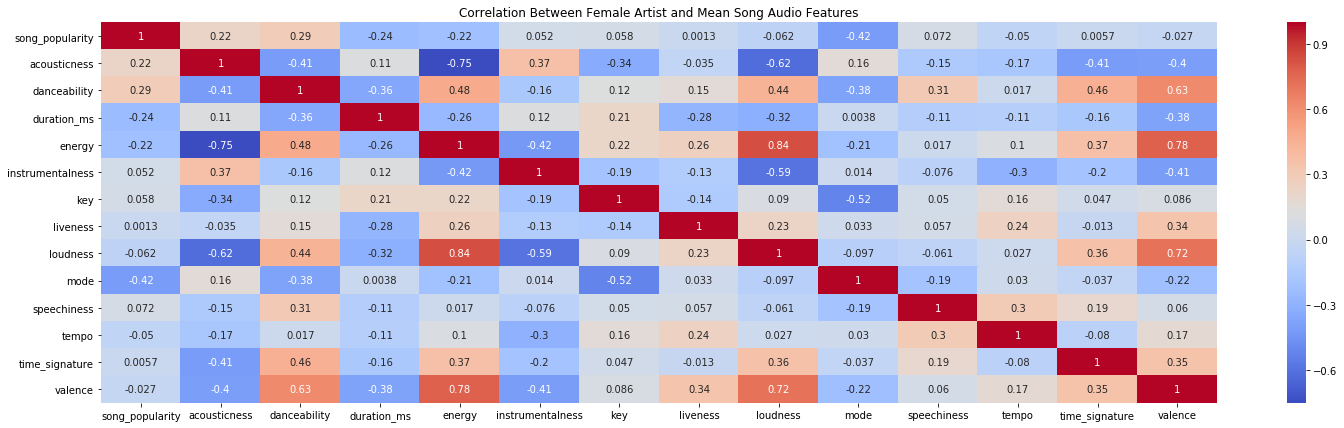

In [27]:
#plot a heatmap for the mean dataframe we just created.
plt.figure(figsize = (25,7))
sns.heatmap(female_mean_song_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Female Artist and Mean Song Audio Features')
plt.show()

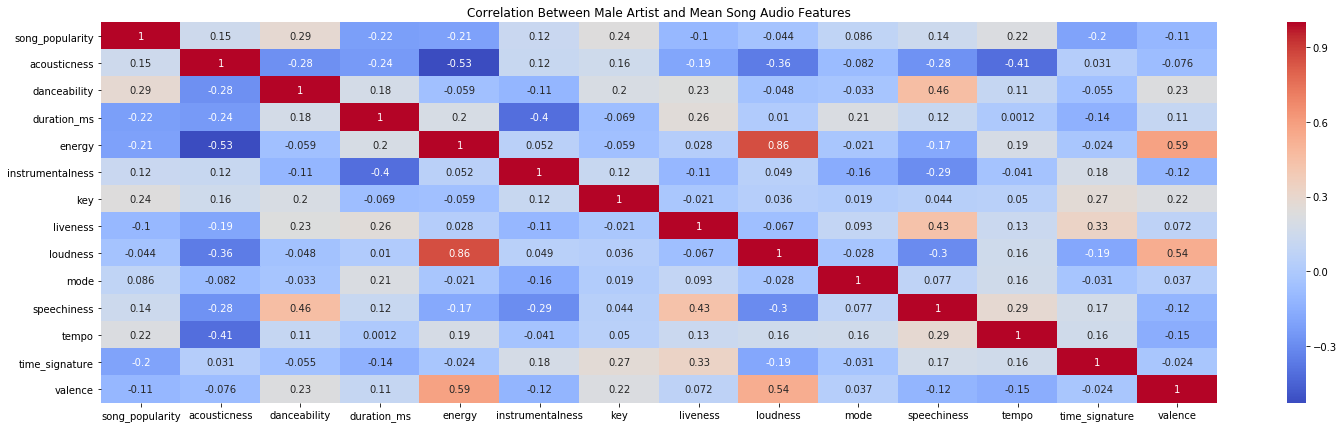

In [28]:
plt.figure(figsize = (25,7))
sns.heatmap(male_mean_song_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Male Artist and Mean Song Audio Features')
plt.show()


# edit this one
At this level, there does seem to be slighly more correlation between dancability,

_Now, that we have the data like this it may be easier to check if these average song audio features have an impact on the artists overall popularity_

In [30]:
#create a smaller df of the artist attributes to append to the mean one
#append these two on the columns axis (1), and join it on either index (they should be the same)

short_female_attributes = female_artists_attributes[['artist_popularity','followers','genres','name']]
female_song_artist_attri = pd.concat([female_mean_song_attri, short_female_attributes], axis=1, join_axes=[short_female_attributes.index])

short_male_attributes = male_artists_attributes[['artist_popularity','followers','genres','name']]
male_song_artist_attri = pd.concat([male_mean_song_attri, short_male_attributes], axis=1, join_axes=[short_male_attributes.index])

In [37]:
#check to make sure the names in the two name columns align 
(female_song_artist_attri['name'] == female_song_artist_attri['artist_name']).isnull().any()
(male_song_artist_attri['name'] == male_song_artist_attri['artist_name']).isnull().any()

False

In [38]:
#since we know that they do, drop the 'name' column
female_song_artist_attri = female_song_artist_attri.drop(['name'],axis=1)
male_song_artist_attri = male_song_artist_attri.drop(['name'],axis=1)

In [39]:
#again, we need to ensure that the columns are numeric, specify the columns 
#and apply to_numeric() method

col_names_3 = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'song_popularity', 'speechiness', 'tempo', 'time_signature', 'valence',
       'artist_popularity', 'followers']
female_song_artist_attri[col_names_3] = female_song_artist_attri[col_names_3].apply(pd.to_numeric)
male_song_artist_attri[col_names_3] = female_song_artist_attri[col_names_3].apply(pd.to_numeric)

_now that we have this new DataFrame of Artists Attributes with their mean song features, we can look fro correlation at this level. let's create a heatmap to see if there is anything new_

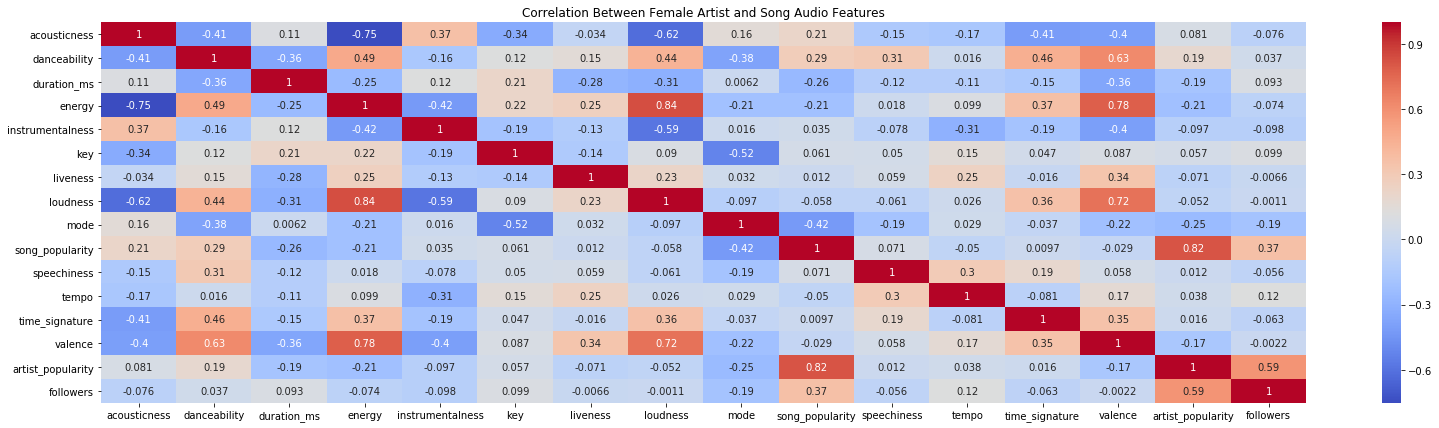

In [379]:
#create a heatmap of the data frame we just created with the .corr() method called on it

female_avg_song_artist_features_heatmap = plt.figure(figsize = (27,7))
sns.heatmap(female_song_artist_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Female Artist and Song Audio Features')
female_avg_song_artist_features_heatmap.savefig('female_avg_song_artist_features_heatmap.png')
plt.show()

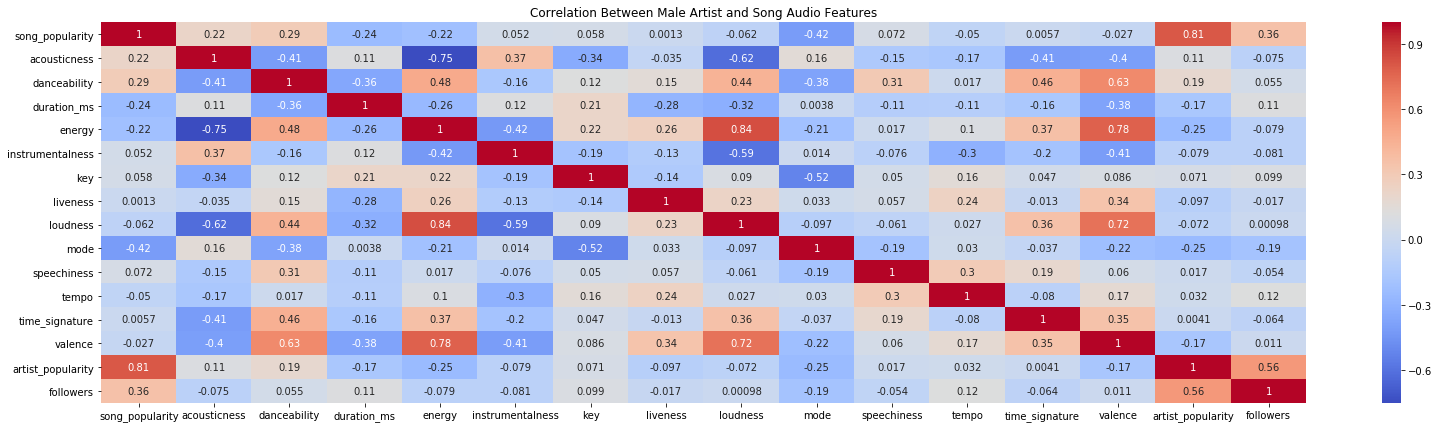

In [40]:
male_avg_song_artist_features_heatmap = plt.figure(figsize = (27,7))
sns.heatmap(male_song_artist_attri.corr(), cmap="coolwarm", annot=True).set_title('Correlation Between Male Artist and Song Audio Features')
male_avg_song_artist_features_heatmap.savefig('male_avg_song_artist_features_heatmap.png')
plt.show()


### Conclusions

__the biggest correlation in this data was between artist popularity and song popularity__,
and that seems intuivitively correct. Many songs can share very simialr song features, but the one by a popular artist will be the one will the most success. 

Becuase the popular artists has more followers, and most likely more press coverage, the song is easily avaible to a wider audience. It makes perfect sense that Ariana Grade is our top artists and her songs are being played the most--a good portion of the popularity of the song may be due to hype alone and not instrinsic _goodness_

### more data to explore
_lets look into genres and words in song titles_

In [97]:
#get the attributes with the genres and artists in each row, so we can get the corr between those
#break them all up and create a count of them, make a bar chart

female_genre, female_counts = count_genre_x_y(female_artists_attributes)

In [104]:
#get the attributes with the genres and artists in each row, so we can get the corr between those
#break them all up and create a count of them, make a bar chart

male_genre, male_counts = count_genre_x_y(male_artists_attributes)

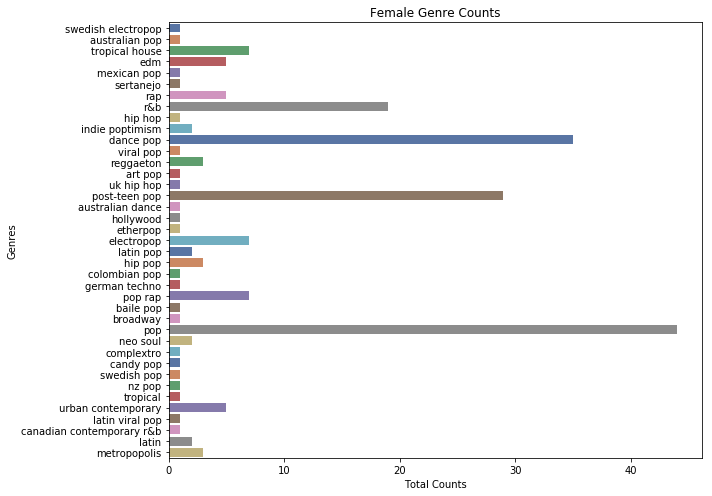

In [103]:
female_genre_fig = plt.figure(figsize = (10,7))
plt.title('Female Genre Counts')
plt.ylabel('Genres')
plt.xlabel('Total Counts')
ax = sns.barplot(female_counts,female_genre, palette="deep")
plt.tight_layout()
female_genre_fig.savefig('female_genre_counts.png')

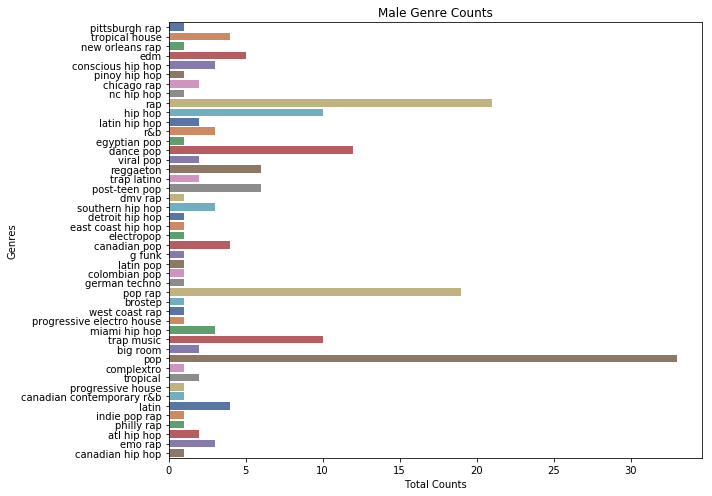

In [105]:
male_genre_fig = plt.figure(figsize = (10,7))
plt.title('Male Genre Counts')
plt.ylabel('Genres')
plt.xlabel('Total Counts')
ax = sns.barplot(male_counts,male_genre, palette="deep")
plt.tight_layout()
male_genre_fig.savefig('male_genre_counts.png')

_here it is pretty obvious that the largest genre's that make up the female category are pop: pop, post-teen pop (aka Ariana Grande), and dance pop (also ari)._

In [ ]:
#here we created a dataframe of the upper and lower quartiles for each column
#of song_features_df

iqr_song_features = song_features_df.quantile([0.25,0.75])

In [272]:
#this is a function that should go through the df, and return the value of the cell
#if it is not an outlier, and return NaN if it is an outlier

def is_in_iqr(iqr,data):
    n_data = data
    for i in iqr:
        count = 1
        while count < len(n_data[i]):
            iqr_num = (iqr[i].values[1] - iqr[i].values[0])*1.5
            mean = n_data[i].mean()
            upper, lower = mean+iqr_num, mean-iqr_num
            n_data[i] = n_data[i].apply(lambda x: x if (x >= lower) and (x <= upper) else np.NaN)
            count += 1
    return n_data

In [298]:
from scipy.stats import normaltest
data = song_features_df['danceability']
stat, p = normaltest(data)
print(stat, p)

16.064054747392813 0.00032488886963416043


In [299]:
from scipy.stats import pearsonr
data1, data2 = song_features_df['danceability'],song_features_df['song_popularity']
corr, p = pearsonr(data1, data2)
print(corr, p)

0.1493107351473812 0.0008510502853917157
